<span style="color: Navy; font-size: 45px">**What drives the price of a car?**</span>

<span style="color: Navy; font-size: 35px">**Overview**</span>

*(Instructions: In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.)*

<span style="color: Navy; font-size: 25px">**CRISP-DM Framework**</span>

*(Instructions: To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.)*

<span style="font-size: 35px; color: Navy">**Business Understanding**</span>

*(Instructions: From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.)*

<span style="color: Navy; text-decoration: underline">**Determine Business Objectives:**</span> Used car dealerships are interested in maximizing their profits from used car sales. This includes the following: acquiring high-value inventory for resale, paying as little as possible for acquiring said high-value inventory, performing as little maintenance and cosmetic improvements necessary on acquired inventory, and charging customers as much as possible to purchase used cars. At every step of this process, it is imperative to know what characteristics of used cars will drive consumer interest, and therefore high sales price. Therefore, used car dealerships are incentivized to use high-quality information to make decisions about purchasing, maintaining, and pricing inventory. This high-quality information would include objective data regarding which qualities of used cars are associated with customers paying more for used cars.

<span style="color: Navy; text-decoration: underline">**Assess Situation:**</span> I am working with data, scraped from Craigslist, with the intention of providing recommendations to a single used car dealership regarding qualities in their product that will net the highest profits. I am assuming that the data I am using is relevant to this dealer; therefore, I am assuming that the customer segment that will be patronizing this business is qualitatively similar to the customer segment that uses Craigslist, and will show similar patterns of purchasing behavior. If that is *not* the case, then the data quality I provide is limited, and so care should be taken to delineate which factors within the data might moderate the relationships between car characteristics and sales price. 

There are tangible, possible benefits that could result from using this data to alter business behavior. Because this information will pertain to the relationship between inventory characteristics and interpreted in terms of statistical relationships, there is the strong possibility that using this data wisely will increase profits. However, because market conditions specific to a single business, including local market rates for used cars, may be different from national data, it should be stressed that the value of this information comes in identifying which inventory characteristics are likely to drive increased profit margins, rather than offering specific predictions of how much increase in profit margins there will be.

Finally, there is a risk that the data I provide will be too out of date, or not relevant enough to local market trends, to see the expected increase in profits if these suggestions are used by the car dealer to alter marketing or inventory acquisition behavior. Therefore, all necessary precautions should be taken to minimize this risk, and a plan should be set in place to continually evaluate business performance against projections, to test for the net profit increase resulting from this information.

<span style="color: Navy; text-decoration: underline">**Data Mining Goals:**</span> The goals of this project will be to identify the relationships between used car characteristics (predictors) and sales prices (target). This will require a thorough evaluation of the dataset, identifying and possibly controlling for the bivaraiate and multivariate relationships between predictors, and theoretically sound assumptions behind choosing which model to use to evaluate predictor-target relationships.

Data-mining will be successful if strong relationships can be found between car characteristics and sales prices. Because we can assume *a priori* that sales prices are not random, if I can find no relationships in our dataset, it is most likely because the dataset does not contain enough information, or there was an error in data analysis or the original data scraping.

<span style="color: Navy; text-decoration: underline">**Project Plan:**</span> The data has already been scarped from the internet, and only exploratory data analysis, data cleaning, and data modeling are left. The project will consist of the aforementioned data preprocessing and data processing steps, as well as writing a summary of findings for presentation to the client (the used car dealer).

<span style="font-size: 35px; color: Navy">**Data Understanding**</span>

*(Instructions: After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.)*

<span style="font-size: 25px; color: Navy;  text-decoration: underline">**Initial EDA:**</span>

The data comes from kaggle.com, and is a [used car dataset scraped from Craigslist](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data). First, I will import necessary Python libraries and load the dataset, then perform initial data anlaysis, including:
- identifying feature number, types, and contents
- identifying any missing data and deciding how to deal with missing data
- prepare data for exploratory data analysis, including modeling bivariate correlations between numeric data and visualizing the target feature
- summarize my findings and prepare for the Data Preparation phase

<span style="font-size: 25px; color: Navy; font-size: 18px; text-decoration: underline">**Data Import:**</span>

In [1]:
# Python library import block
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encoders and other important functions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder # I tried TargetEncoder fro sklearn.preprocessing, but kept getting an 'out of memory' error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

# Custom functions from module
from pract2_modules import top_bottom_frequencies # show the top and bottom N frequencies for a categorical column
from pract2_modules import plotColumnCounts # bar plots (categorical) or histograms (numerical) for columns
from pract2_modules import cprint # colored print; makes some output a bit easier to read
from pract2_modules import trim_feature # remove categories from a model if the total proportion represented is under a certain threshold (default: 1%)

In [2]:
cars = pd.read_csv("data/vehicles.csv")

In [3]:
# Get information -- .info(), .head(), and .describe()

print(cars.shape)
cars.info()

(426880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  obje

In [4]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


<span style="font-size: 25px; color: Navy;  text-decoration: underline">**Check for duplicated values:**</span>

In [6]:
# Check for any duplicated rows
cars.duplicated().sum()

0

In [7]:
# `VIN` shoudl be a unique identifier; check for any duplicte VIN values
cars.VIN.dropna().duplicated().sum()

147592

In [8]:
# Check for whether repeat VIN values exist after taking out NaN values for VIN and manufacturer (since it is possible for VIN values to repeat across manufacturers)

cars_noVIN = cars.dropna(subset = 'VIN').dropna(subset = 'manufacturer')
cprint(cars_noVIN.shape, 'red')
cprint(f'{cars_noVIN["VIN"].duplicated().sum()} duplicate values', 'red')
cars_noVIN[cars_noVIN.VIN.duplicated(keep = False)].sort_values('VIN').tail(20)

(258106, 18)
142892 duplicate values


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
323952,7316393690,portland,124900,2006.0,ferrari,430,NaN,8 cylinders,other,10500.0,clean,manual,ZFFEW58A360145008,rwd,NaN,other,NaN,or
408931,7316512203,seattle-tacoma,124900,2006.0,ferrari,430,NaN,8 cylinders,other,10500.0,clean,manual,ZFFEW58A360145008,rwd,NaN,other,NaN,wa
284102,7314398646,new hampshire,129995,2007.0,ferrari,f430 spider,NaN,NaN,gas,12351.0,clean,manual,ZFFEW59A470152419,NaN,NaN,convertible,black,nh
178460,7314389522,maine,129995,2007.0,ferrari,f430 spider,NaN,NaN,gas,12351.0,clean,manual,ZFFEW59A470152419,NaN,NaN,convertible,black,me
187460,7314445453,boston,129995,2007.0,ferrari,f430 spider,NaN,NaN,gas,12351.0,clean,manual,ZFFEW59A470152419,NaN,NaN,convertible,black,ma
44882,7311001398,palm springs,105000,1997.0,ferrari,f355 spider,excellent,8 cylinders,gas,22000.0,clean,manual,ZFFXR48A9V0108442,NaN,NaN,convertible,NaN,ca
45399,7306850475,palm springs,105000,1997.0,ferrari,f355 spider,excellent,8 cylinders,gas,0.0,clean,manual,ZFFXR48A9V0108442,NaN,NaN,convertible,NaN,ca
44134,7315844696,palm springs,99999,1997.0,ferrari,f355 spider,excellent,8 cylinders,gas,22000.0,clean,manual,ZFFXR48A9V0108442,NaN,NaN,convertible,NaN,ca
44389,7314331344,palm springs,99999,1997.0,ferrari,f355 spider,excellent,8 cylinders,gas,22000.0,clean,manual,ZFFXR48A9V0108442,NaN,NaN,convertible,NaN,ca
45131,7309043273,palm springs,105000,1997.0,ferrari,f355 spider,excellent,8 cylinders,gas,22000.0,clean,manual,ZFFXR48A9V0108442,NaN,NaN,convertible,NaN,ca


Lots of repeats. Will have to check to see if these are all just the result of different values in `id`, `region`, `state`.

<span style="font-size: 25px; color: Navy; text-decoration: underline">**Check for missing values:**</span>

In [9]:
pd.DataFrame({'missing': cars.isna().sum(), 'perc': cars.isna().sum()/cars.shape[0]*100}).sort_values('missing')

,missing,perc
id,0,0.000000
price,0,0.000000
state,0,0.000000
region,0,0.000000
year,1205,0.282281
transmission,2556,0.598763
fuel,3013,0.705819
odometer,4400,1.030735
model,5277,1.236179
title_status,8242,1.930753


We have 15 features, one of which is `id` and may be useful to set as the index. 10 features are missing less than 5% of the data, but some features have a lot of data missing. However, features like `odomoter`, `year`, `model`, and `title_status` all have most of the data, and likely all have some strong predictive value of the outcome. So, we will likely not clean on those missing data. If we could run a ML algorithm to impute data based on other characteristics we could do that; however, that is outside the scope of the current assignment.

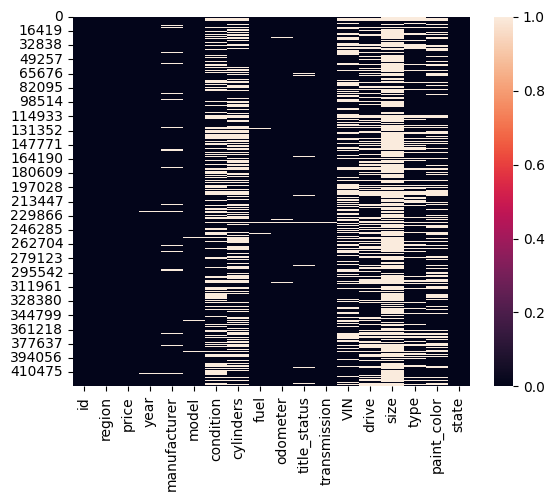

In [10]:
sns.heatmap(cars.isna()) # visualize missingness across features
plt.show()

Lots of data missing for `size` and a few others; may be we have to drop these.

Get unique values for all object features, to see if any need to be transformed into numerical. Then, use the custom function `top_bottom_frequencies` to get the top and bottom most frequent values within a feature.

In [11]:
cars.nunique().sort_values()

drive                3
transmission         3
size                 4
fuel                 5
condition            6
title_status         6
cylinders            8
paint_color         12
type                13
manufacturer        42
state               51
year               114
region             404
price            15655
model            29649
odometer        104870
VIN             118246
id              426880
dtype: int64

In [12]:
# Using `top_bottom_frequencies` to identify consistency across features. Features with more unique values: using nval = 10
top_bottom_frequencies(cars, ['region', 'manufacturer', 'model', 'VIN', 'state'], nval = 10, dropna=True)

VIN                    manufacturer                  model  \
  count              value        count            value count   
0   261  1FMJU1JT1HEA52352        70985             ford  8009   
1   235  3C6JR6DT3KG560649        55064        chevrolet  5140   
2   231  1FTER1EH1LLA36301        34202           toyota  4211   
3   227  5TFTX4CN3EX042751        21269            honda  3135   
4   214  1GCHTCE37G1186784        19067           nissan  3023   
5   207  1GTN1TEH5EZ273019        19014             jeep  2969   
6   199  3VWF17AT1FM655022        18342              ram  2848   
7   198  JN1AZ4EH8KM420880        16785              gmc  2799   
8   195  1FTMF1CP3GKD62143        14699              bmw  2779   
9   194  1GTR1WE07DZ143724        13707            dodge  2746   
0     1  1C4PJMJX4JD594570         1090           saturn     1   
1     1  1GC2KVCG5DZ364053          897       alfa-romeo     1   
2     1  3FADP4BJ7DM171931          868            tesla     1   
3     1  5NMS2CAD0LH150152          792             fiat     1   
4     1  2G4GP5EX5E9213578          153  harley-davidson     1   
5     1  1GCEK19J78Z219711           95          ferrari     1   
6     1  JA4AT3AW1AZ006543           63           datsun     1   
7     1  4T1BF28B61U153724           24     aston-martin     1   
8     1  JTHCF5C25A5041393           21       land rover     1   
9     1  SAJGX2749VCOO8376            3           morgan     1   

                           region                            state        
                     value  count                     value  count value  
0                    f-150   3608                  columbus  50614    ca  
1           silverado 1500   3562              jacksonville  28511    fl  
2                     1500   2988   spokane / coeur d'alene  22945    tx  
3                    camry   2985                    eugene  19386    ny  
4                silverado   2983           fresno / madera  17696    oh  
5                   accord   2983                   orlando  17104    or  
6                 wrangler   2982                      bend  16900    mi  
7                    civic   2982    omaha / council bluffs  15277    nc  
8                   altima   2981             new hampshire  13861    wa  
9                   escape   2981  kennewick-pasco-richland  13753    pa  
0              oddysey exl     40                eastern CO   2513    vt  
1  PETERBILT 330 RV HAULER     36               southern WV   2320    ri  
2            tahoe lt 1500     35                  st louis   1302    sd  
3           serbring convt     34              northeast SD   1150    ut  
4         Chevelet Venture     30              southwest TX   1052    wv  
5          plymouth fury 1     28                  meridian   1036    ne  
6  f550 box truck delivery     14              southwest MS   1016    ms  
7           duramax 2500hd     11               kansas city    949    de  
8                3 s sport      9            fort smith, AR    610    wy  
9  Paige Glenbrook Touring      8       west virginia (old)    410    nd

After examining, do the following:
- Use VIN to identify duplicates entries across regions, then drop (no reason to assume it correlates with price, and not feasible to encode for regression)
- Region seems to be a list of [Craigslist regions](https://geo.craigslist.org/iso/us); may be useful beyond state
- OHE cylinders, drive, fuel, paint_color, size, title_status, transmission, type as they are
- Will need to work with manufacturer and model to see if I can combine similar entries and account for differences in entries; too many entries to feasibly OHE for now

<span style="font-size: 25px; color: Navy; text-decoration: underline">**Visualizations:**</span>

Now, initial visualizations of the data. Bar charts for categorical data, histograms for numerical, and also correlation matrix for numerical data.

For this section, I will use the custom function `plotColumnCounts` to produce plot matrices.

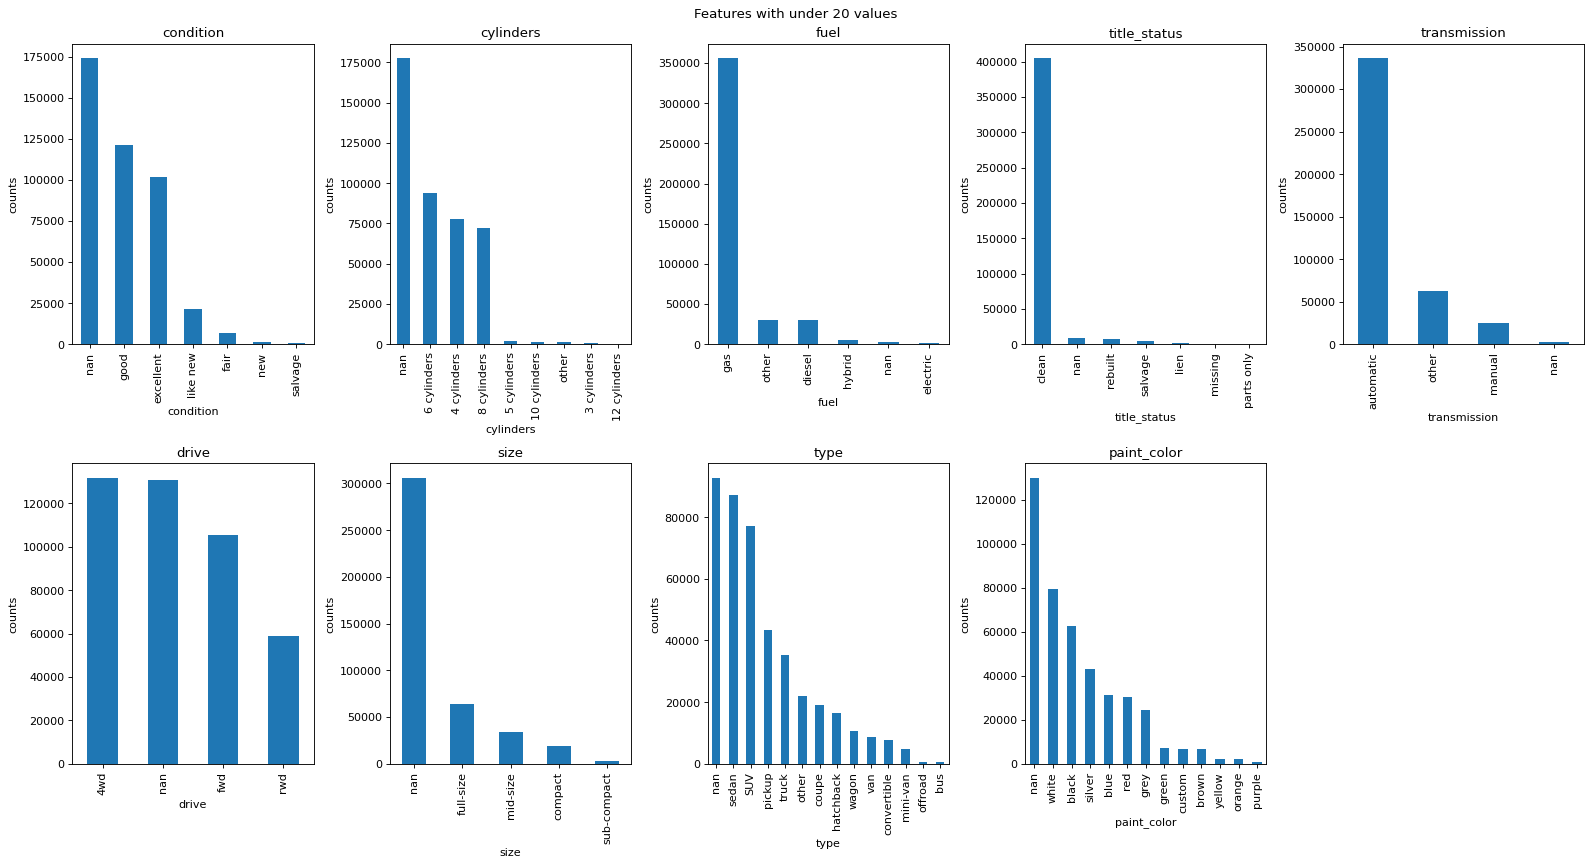

In [13]:
plotColumnCounts(cars, ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'], 5, stitle = 'Features with under 20 values', dropna = False)

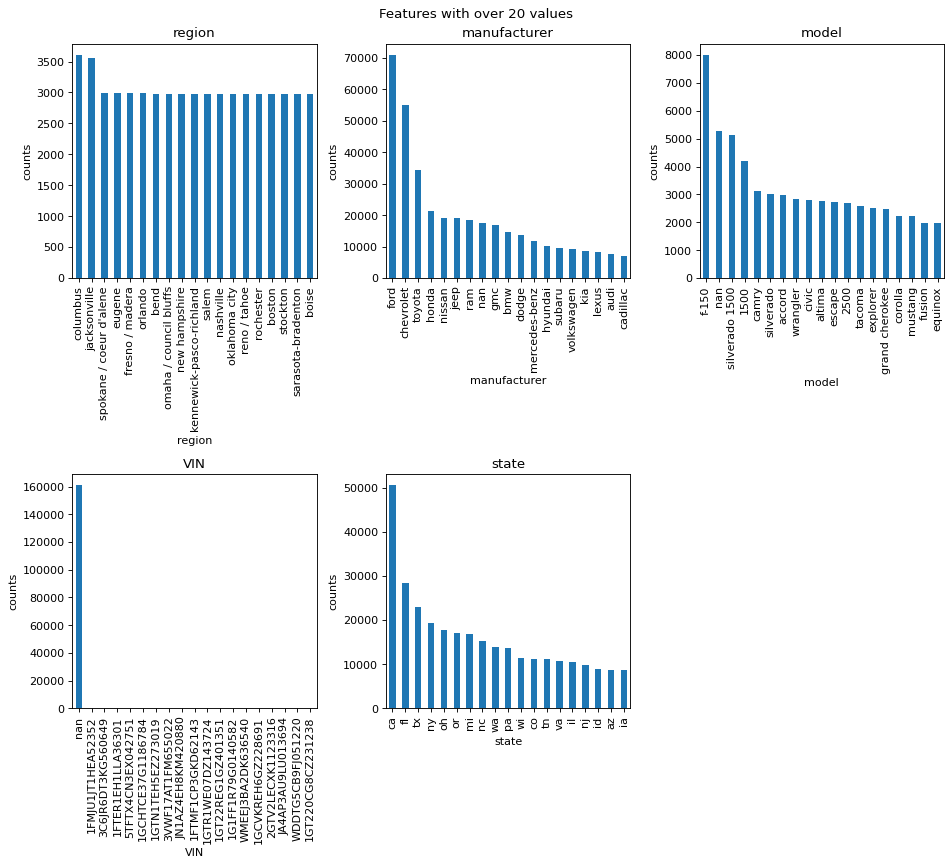

In [14]:
plotColumnCounts(cars, ['region', 'manufacturer', 'model', 'VIN', 'state'], 3, stitle = 'Features with over 20 values', dropna = False)

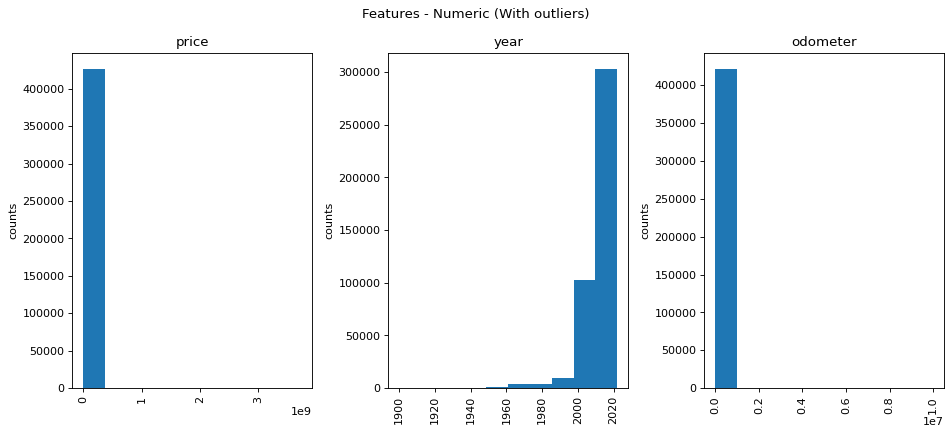

In [15]:
plotColumnCounts(cars, ['price', 'year', 'odometer'], 3, stitle = 'Features - Numeric (With outliers)')

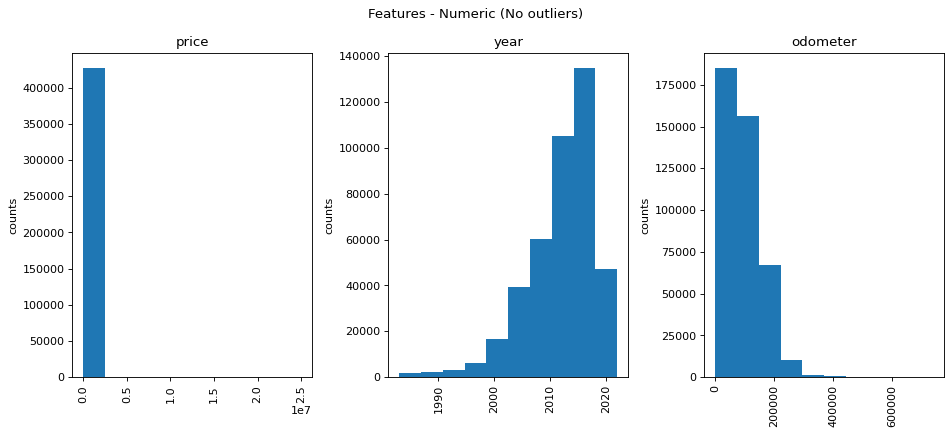

In [16]:
plotColumnCounts(cars, ['price', 'year', 'odometer'], 3, outlier_mask = True, stitle = 'Features - Numeric (No outliers)')

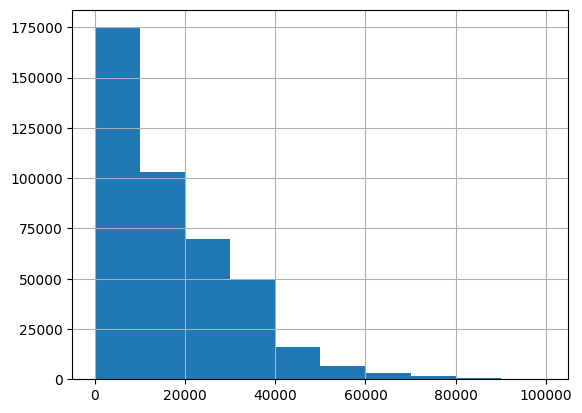

In [17]:
# Identify why there are still extreme outliers in Price
cars.price[cars.price < 100000].hist()
plt.show()

Sharp decline around \\$40k. See if the cars in that price range make sense, and also check \\$60k.

In [18]:
cars[(cars.price > 40000)].sort_values(by = 'price').head(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
146966,7316671842,"st louis, MO",40128,2020.0,jeep,wrangler unlimited,NaN,NaN,gas,24884.0,clean,automatic,1C4HJXENXLW204237,4wd,NaN,NaN,black,il
146997,7316495025,"st louis, MO",40130,2016.0,gmc,sierra,NaN,NaN,gas,59838.0,clean,automatic,3GTU2NEC8GG381162,4wd,NaN,pickup,white,il
147976,7314326498,"st louis, MO",40130,2016.0,gmc,sierra,NaN,NaN,gas,59838.0,clean,automatic,3GTU2NEC8GG381162,4wd,NaN,pickup,white,il
213323,7311345740,mankato,40186,2021.0,ford,explorer,NaN,4 cylinders,gas,NaN,clean,automatic,1FMSK8DH3MGB17209,4wd,NaN,SUV,NaN,mn
45250,7308028495,palm springs,40280,2020.0,ford,mustang ecoboost premium,excellent,4 cylinders,gas,2772.0,NaN,automatic,1FATP8UH9L5147759,NaN,NaN,convertible,NaN,ca
155471,7304171385,terre haute,40283,2018.0,ford,f150 xlt,NaN,NaN,gas,43541.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,in
145519,7316227836,southern illinois,40283,2018.0,ford,f150,NaN,NaN,gas,43541.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,il
145901,7304171324,southern illinois,40283,2018.0,ford,f150,NaN,NaN,gas,43541.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,il
155322,7316227903,terre haute,40283,2018.0,ford,f150 xlt,NaN,NaN,gas,43541.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,in
146060,7316227873,springfield,40283,2018.0,ford,f150,NaN,NaN,gas,43541.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,il


In [19]:
cars[(cars.price > 60000)].sort_values(by = 'price').head(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
194670,7302012940,ann arbor,60029,2019.0,ford,f-150,NaN,NaN,gas,18488.0,clean,automatic,1FTEW1EG3KFA12921,4wd,NaN,NaN,black,mi
133222,7312899857,boise,60118,2020.0,ford,super duty f-350 drw,NaN,8 cylinders,diesel,30925.0,clean,automatic,1FT8W3DT8LEC22428,4wd,NaN,truck,white,id
146456,7307366140,springfield,60295,2018.0,gmc,sierra 2500hd denali,NaN,NaN,diesel,58137.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,il
75501,7316888487,denver,60337,2016.0,chevrolet,silverado high countr,NaN,NaN,diesel,58949.0,clean,automatic,1GC4K1E88GF245880,4wd,NaN,NaN,NaN,co
231261,7316737734,boone,60338,2019.0,gmc,sierra 1500 denali,good,8 cylinders,gas,36466.0,clean,automatic,1GTU9FEL2KZ339192,NaN,NaN,pickup,black,nc
141701,7315216440,chicago,60495,2017.0,chevrolet,camaro zl1,good,NaN,other,3833.0,clean,automatic,1G1FK1R64H0205763,rwd,NaN,coupe,white,il
341844,7316173785,rhode island,60500,2012.0,NaN,Kenworth T270,excellent,6 cylinders,diesel,250889.0,clean,automatic,2NKHHM6X9CM296956,rwd,full-size,truck,white,ri
342277,7313986796,rhode island,60500,2012.0,NaN,Kenworth T270,excellent,6 cylinders,diesel,250889.0,clean,automatic,2NKHHM6X9CM296956,rwd,full-size,truck,white,ri
93266,7305165478,daytona beach,60515,2021.0,ford,super duty f250 srw xl,NaN,NaN,diesel,18.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl
231510,7304589372,boone,60573,2019.0,chevrolet,silverado 2500hd high,good,8 cylinders,diesel,55850.0,clean,automatic,1GC1KUEYXKF238135,NaN,NaN,pickup,NaN,nc


Will have to filter dataset to remove anything with a price over 60000. I conducted on a random review of cars above \\$40k and \\$60k, comparing their listed sale price against MSRP for that make/model/year. 60k seems to be the range where car prices start to fail to match the MSRP for even new cars of that make and model, meaning that this is possibly the range where the asking price starts to become very disconnected from realistic market value of the vehicle. Because of that, and because I have to make a cutoff somewhere reasonable, I will use \\$60k as the cutoff.

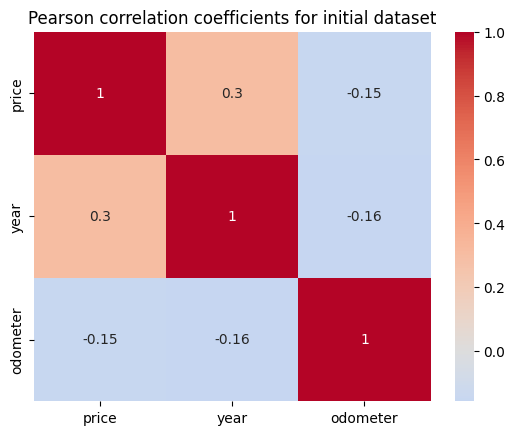

In [20]:
# Visualize correlations b/t numeric features
sns.heatmap(
    cars.drop('id',axis=1)[cars.price < 60000].select_dtypes(include = ['int64', 'float64']).corr(),
    annot = True, cmap = 'coolwarm', center = 0
)
plt.title('Pearson correlation coefficients for initial dataset')
#plt.savefig('images/pearson_initial.png', dpi = 300)
plt.show()

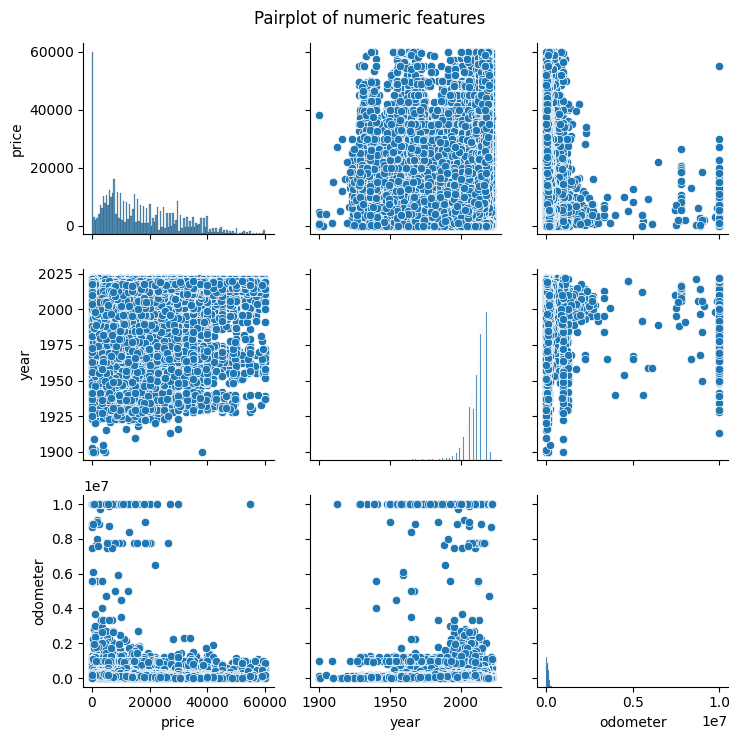

In [21]:
sns.pairplot(
    cars.drop('id',axis=1)[cars.price < 60000].select_dtypes(include = ['int64', 'float64'])
)
plt.suptitle('Pairplot of numeric features')
plt.tight_layout()
plt.show()

Looks like `odometer` is a bit binned; likely, when advertising, sellers will round it, sometimes to the nearest 1000 (or even 5000 or 10000), and this rounding effect is likely stronger as absolute value increases. Possible nonlinear relationship between odometer and price, then.

<span style="font-size: 25px; color: Navy; text-decoration: underline">**Data Quality Report:**</span>

After initial data exploration, it is clear the dataset suffers from some data quality issues:
- **Price**: The data must be filtered on price so as to keep only vehicles priced under \\$60k. Without more advanced methods of detecting when car prices are reasonably attached to car value, this seems like a reasonable cutoff for ensuring data quality.
- **Model and Manufacturer**: When sellers are creating their adverisements on craigslist, there seems to be no data validation methods for standardizing manufacturer and model entries; this results in too many features to be reasonably encoded with OHE, so steps will have to be taken to clean on this data as well.
- **VIN**: Examining the VIN values revealed that there are multiple cases (likely thousands) where the same car was advertised in multiple regions on craigslist, leading to duplicate entries that are not flagged as such by just running `cars.duplicated()`. Will have to do further investigation and cleaning in the next phase.

<span style="font-size: 35px; color: Navy">**Data Preparation**</span>

*(Instructions: After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.)*

<span style="font-size: 25px; color: Navy; text-decoration: underline">**Data Cleaning:**</span>

The below steps lay out what I will do with the data cleaning:
- **Filter on Price value**: Filter out all cases where the price is > \\$60k, and probably where it is < \\$100 (because this suggests unserious or mistake ads)
- **Filter on VIN duplicates**: Identify which cases are true duplicates, using the VIN column, and then filter out true duplicates
- **Clean on Model and Manufacturer**: This category may improve after other filterings, but if not, see if it's feasible to combine or clean out non-standard instances of model and manufacturer, to reduce OHE-transformations of these features that can be included in a model.

<span style="font-size: 18px; color: Navy; text-decoration: underline">**Filter on Price**</span>

In [22]:
# get count of how many values within certain ranges
cprint(f'Cars at price == 0: {sum(cars.price==0)}', 'red')
cprint(f'Cars at price < 100: {sum(cars.price<100)}', 'red')
cprint(f'Cars at price < 1000: {sum(cars.price<1000)}', 'red')

Cars at price == 0: 32895
Cars at price < 100: 36222
Cars at price < 1000: 46315


In [23]:
# Filter on 'price' being under 60k and over 100

df = cars[(cars.price < 60000) & (cars.price > 100)].set_index('id')
cprint(df.shape, 'red')
pd.concat([df.sort_values('price').head(), df.sort_values('price').tail()])

(384171, 17)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7314775169,redding,101,2008.0,mercury,grand marquis,NaN,8 cylinders,gas,29300.0,clean,automatic,2MEFM74V28X608790,rwd,NaN,sedan,NaN,ca
7314774578,monterey bay,101,2008.0,mercury,grand marquis,NaN,8 cylinders,gas,29300.0,clean,automatic,2MEFM74V28X608790,rwd,NaN,sedan,NaN,ca
7309204403,stockton,101,2014.0,nissan,altima,NaN,4 cylinders,gas,117332.0,clean,automatic,1N4AL3AP3EN205577,fwd,NaN,sedan,NaN,ca
7308208725,modesto,101,2014.0,nissan,altima,NaN,4 cylinders,gas,117332.0,clean,automatic,1N4AL3AP3EN205577,fwd,NaN,sedan,NaN,ca
7308707028,modesto,101,2011.0,bmw,3 series,NaN,6 cylinders,gas,101490.0,clean,automatic,WBAPH5C58BA442594,rwd,NaN,sedan,NaN,ca
7312317260,kennewick-pasco-richland,59999,2018.0,gmc,sierra 2500 hd all terrain,NaN,NaN,gas,35425.0,clean,automatic,1GT12TEG4JF139942,4wd,NaN,truck,black,wa
7313578805,wenatchee,59999,2020.0,nissan,armada platinum 4x4 gas,NaN,NaN,gas,8899.0,clean,automatic,JN8AY2NE9L9781604,4wd,NaN,SUV,white,wa
7313477879,north jersey,59999,2015.0,mercedes-benz,s-class,NaN,NaN,gas,39500.0,clean,automatic,WDDXJ8FBXFA007016,NaN,full-size,coupe,black,nj
7308097109,billings,59999,2019.0,ram,3500,NaN,NaN,diesel,3219.0,clean,automatic,3C63RRGL1KG549574,NaN,NaN,pickup,white,mt


In [24]:
# remove any rows that are now duplicated, since `id` column may have been the only thing separating them
cprint(df.duplicated().sum(), 'red')
df = df[~df.duplicated()]
df.shape

46988


(337183, 17)

<span style="font-size: 18px; color: Navy; text-decoration: underline">**Filter on VIN (Removing duplicate rows)**</span>

Because there are many 'NaN' values in both `manufacturer` and `VIN`, will want to see if any VIN values are duplicated across manufacturers. To do this, compare difference in shapes between duplicate rows when removing 'NaN' values from both `manufacturer` and `VIN`, vs. just removing from `VIN`.

In [25]:
df_VINdups_noNAdrop = df.drop(['region','state'], axis=1).dropna(subset = 'VIN').duplicated(keep=False)
df_VINdups_noNAdrop.sum()

116902

In [26]:
df_VINdups_NAdrop = df.drop(['region','state'], axis=1).dropna(subset = ['VIN', 'manufacturer']).duplicated(keep=False)
df_VINdups_NAdrop.sum()

113344

In [27]:
check_index = df_VINdups_noNAdrop.index.difference(df_VINdups_NAdrop.index)
df.loc[check_index].sort_values('VIN').tail(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7315009135,dayton / springfield,43991,2017.0,NaN,Maserati LEVANTE LUXURY,excellent,6 cylinders,gas,47891.0,NaN,automatic,ZN661XUL7HX239289,4wd,NaN,SUV,NaN,oh
7312023587,pittsburgh,43991,2017.0,NaN,Maserati LEVANTE LUXURY,excellent,6 cylinders,gas,47891.0,NaN,automatic,ZN661XUL7HX239289,4wd,NaN,SUV,NaN,pa
7316807849,central NJ,46995,2018.0,NaN,Maserati Levante,NaN,NaN,gas,24333.0,clean,automatic,ZN661XULXJX303556,NaN,NaN,NaN,NaN,nj
7315110366,chicago,50988,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,7549.0,clean,automatic,ZN661XUS7HX248033,NaN,NaN,SUV,black,il
7314533728,palm springs,50988,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,7549.0,clean,automatic,ZN661XUS7HX248033,NaN,NaN,SUV,black,ca
7316693493,portland,58991,2020.0,NaN,Maserati Levante,excellent,NaN,gas,24183.0,clean,automatic,ZN661YUA4LX344692,NaN,NaN,NaN,black,or
7316695987,salem,58991,2020.0,NaN,Maserati Levante,NaN,NaN,gas,24183.0,clean,automatic,ZN661YUA4LX344692,NaN,NaN,NaN,black,or
7313627121,hawaii,55900,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,26695.0,clean,automatic,ZN661YUL1HX236166,NaN,NaN,SUV,blue,hi
7314958959,north jersey,44985,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,49979.0,clean,automatic,ZN661YUL3HX198178,NaN,NaN,SUV,blue,nj


In [28]:
df.loc[check_index]['manufacturer'].value_counts(dropna = False)

manufacturer
NaN    5981
Name: count, dtype: int64

The difference between the two only ever has missing manufacturer data; there's no evidence that we have the rare instance where a VIN number may be repeated across manufacturers. However, there is sometimes data present in one listing that's not in another, e.g., `condition`. So, get a filter index by first sorting on other relevant features, then remove any duplicate `VIN` values. Then, filter the main dataframe on that.

In [29]:
VINfilter = df.sort_values(['condition', 'title_status', 'drive', 'size', 'type'])['VIN'].duplicated()
VINfilter.sum()

233511

In [30]:
df_filt = df.loc[VINfilter.index[~VINfilter]]
cprint(f'Final shape: {df_filt.shape}', 'red')
cprint(f'# of duplicate VIN values left: {df_filt["VIN"].duplicated().sum()}', 'green')

Final shape: (103672, 17)
# of duplicate VIN values left: 0


<span style="font-size: 18px; color: Navy; text-decoration: underline">**Clean on Model/Manufacturer**</span>

Re-visualize model and manufacturer after cleaning.

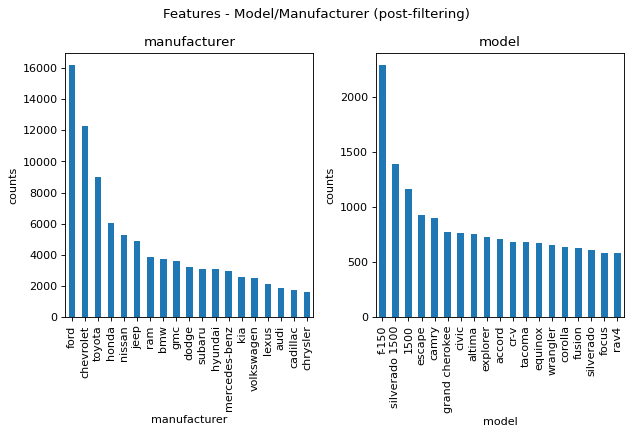

In [31]:
plotColumnCounts(df_filt, ['manufacturer', 'model'], 2, stitle = 'Features - Model/Manufacturer (post-filtering)')

In [32]:
cprint(f'# of unique `manufacturer` values: {df_filt.manufacturer.value_counts().shape[0]}', 'green')
print(f'\t# of unique `manufacturer` values > 100: {df_filt.manufacturer.value_counts()[df_filt.manufacturer.value_counts() > 100].shape[0]}')
cprint(f'# of unique `model` values: {df_filt.model.value_counts().shape[0]}', 'green')
print(f'\t# of unique `model` values > 100: {df_filt.model.value_counts()[df_filt.model.value_counts() > 100].shape[0]}')
print(f'\t# of unique `model` values == 1: {df_filt.model.value_counts()[df_filt.model.value_counts() == 1].shape[0]}')

# of unique `manufacturer` values: 41
	# of unique `manufacturer` values > 100: 36
# of unique `model` values: 15960
	# of unique `model` values > 100: 150
	# of unique `model` values == 1: 10191


In [33]:
# Examine `model` further
df_filt.manufacturer.value_counts().head(41)

manufacturer
ford               16163
chevrolet          12268
toyota              9013
honda               6035
nissan              5299
jeep                4870
ram                 3881
bmw                 3768
gmc                 3637
dodge               3224
subaru              3083
hyundai             3068
mercedes-benz       2989
kia                 2565
volkswagen          2493
lexus               2151
audi                1897
cadillac            1719
chrysler            1651
mazda               1432
buick               1369
acura               1305
infiniti            1136
lincoln              878
volvo                825
mitsubishi           732
mini                 665
rover                641
pontiac              457
porsche              364
jaguar               319
saturn               246
mercury              228
fiat                 204
tesla                159
alfa-romeo           144
harley-davidson       50
datsun                10
ferrari                4
aston-martin

These values seem to have been standardized, so no transcription errors on parts of advertisers. Of the above manufacturers, harley-davidson doesn't make cars, and the others < 100 are probably too few for valid correlations to emerge. Remove these from dataset.

In [34]:
manufacturers_to_remove = df_filt.manufacturer.value_counts().index[df_filt.manufacturer.value_counts() < 100].values
manufacturers_to_remove

array(['harley-davidson', 'datsun', 'ferrari', 'aston-martin',
       'land rover'], dtype=object)

In [35]:
df_filt['manfct_2'] = df_filt.apply(lambda x: x['manufacturer'] if x['manufacturer'] not in manufacturers_to_remove else np.nan, axis =1)
df_filt.manfct_2.value_counts().tail(3)

manfct_2
fiat          204
tesla         159
alfa-romeo    144
Name: count, dtype: int64

In [36]:
# Examine 'model' further
top_bottom_frequencies(df_filt, ['model'], nval = 5) # top and bottom 5 values

model                              
  count                         value
0  2289                         f-150
1  1391                silverado 1500
2  1161                          1500
3   933                        escape
4   899                         camry
0     1     Genesis G70 2.0T Advanced
1     1  x3 sdrive30i sports activity
2     1          Volswagen golf gti s
3     1            sonic lt hatchback
4     1         silverado 1500 base 4

count
1     10191
2      1859
3       886
4       525
5       366
6       283
7       218
8       180
9       141
10      107
Name: count, dtype: int64


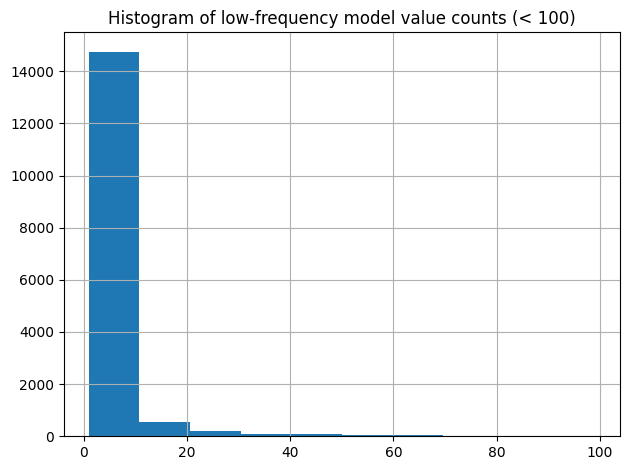

In [37]:
# get count of how many low-frequency values are in dataset
print(df_filt['model'].value_counts().value_counts().head(10))
df_filt['model'].value_counts()[df_filt['model'].value_counts()<100].hist()
plt.title('Histogram of low-frequency model value counts (< 100)')
plt.tight_layout()
plt.show()

In [38]:
model_view = df_filt.model.value_counts()[(df_filt.model.value_counts() > 100) & (df_filt.model.value_counts() < 1000)]
pd.concat([model_view.head(10), model_view.tail(10)], axis=0)

model
escape             933
camry              899
grand cherokee     778
civic              767
altima             759
explorer           729
accord             712
cr-v               687
tacoma             683
equinox            677
pacifica           112
armada             110
crosstrek          108
a6                 106
xc90               106
500                104
rdx                102
transit connect    102
mkz                101
corolla le         101
Name: count, dtype: int64

In [39]:
# Get counts of manufacturers with models with '1500' in the title
df_filt.dropna(subset = 'model')[df_filt.model.dropna().str.contains('1500')][['manfct_2']].value_counts()

manfct_2 
chevrolet    2402
ram          2229
gmc           909
dodge           7
nissan          5
ford            3
cadillac        1
chrysler        1
jeep            1
Name: count, dtype: int64

Most of the values that appear a lot seem to be generic. The `model` value '1500' appears multiple times, as do model numbers that are multiples of 50 like '250' adn '3500'. Update `model` to reflect that, then decide a cutoff point to remove values from `model`, like with `manufacturer`.

In [40]:
model_numbers = np.linspace(50, 5000, 100).astype(int) # identify numbers to be interpereted as models
df_filt['model_number'] = df_filt['model'].str.extract('(\d{2,})') # RegEx; extract digits of length-2 or longer
df_filt['model_number'] = pd.to_numeric(df_filt['model_number']) # change to numeric
# below: create a new model column
df_filt['model_new'] = df_filt.apply(lambda x: f"{x['manufacturer']} {int(x['model_number'])}" if pd.notna(x['model_number']) and x['model_number'] in model_numbers else x['model'], axis=1)

print(f"# of new model values > 1000: {df_filt.model_new.value_counts()[df_filt.model_new.value_counts() > 1000].shape[0]}")
print(f"# of new model values > 800: {df_filt.model_new.value_counts()[df_filt.model_new.value_counts() > 800].shape[0]}")
print(f"# of new model values > 500: {df_filt.model_new.value_counts()[df_filt.model_new.value_counts() > 500].shape[0]}")
print(f"# of new model values > 100: {df_filt.model_new.value_counts()[df_filt.model_new.value_counts() > 100].shape[0]}")
cprint(df_filt['model_new'].value_counts(), 'green')

# of new model values > 1000: 5
# of new model values > 800: 9
# of new model values > 500: 27
# of new model values > 100: 153
model_new
ford 150            4019
chevrolet 1500      2401
ram 1500            2229
ford 250            1461
ford 350            1161
                    ... 
pt cruiser turbo       1
cr-v exl suv           1
element dx suv         1
rav4 limited fwd       1
MGB GT                 1
Name: count, Length: 12510, dtype: int64


This is the best I can do with my current skills. Visualize how many categories exist with between 100 and 1000 values; need to decide a cutoff.

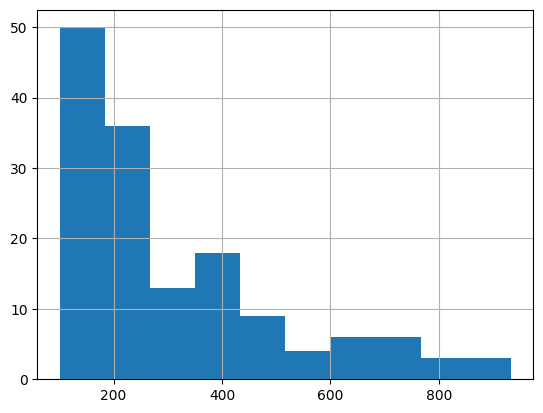

In [41]:
df_filt.model_new.value_counts()[(df_filt.model_new.value_counts()>100) & (df_filt.model_new.value_counts() < 1000)].hist()
plt.show()

I think going with a cutoff of 100 works.

In [42]:
models_to_keep = df_filt.model_new.value_counts().index[df_filt.model_new.value_counts()>100]

df_filt['model_2'] = df_filt.apply(lambda x: x['model_new'] if x['model_new'] in models_to_keep else np.nan, axis = 1)
df_filt.model_2.value_counts().tail(5)

model_2
xc90               106
transit connect    102
rdx                102
corolla le         101
mkz                101
Name: count, dtype: int64

In [43]:
cprint(f'Number of model values kept: {df_filt.model_2.value_counts().sum()}. {100-np.round(df_filt.model_2.value_counts().sum()/df_filt.model.value_counts().sum()*100, 2)}% loss.', color = 'blue')

Number of model values kept: 56775. 44.97% loss.


Further effort might yield higher-quality results and less loss of data from `model`, but for this project I will stop here.

<span style="font-size: 25px; color: Navy; text-decoration: underline">**Select & Construct Data (Feature Engineering)**</span>

In this section, I will:
- Transform numeric features to achieve greater normality (log transform `year`, sqrt transform `price` and `odometer`)
- Create squared features for year and odometer, to simulate second-degree models without creating full interaction effects (to avoid making overly complex models)
- Create alternate encoding options for categorical data

<span style="color: Navy; text-decoration: underline">**Transform Numeric Features**</span>

I initially tested to see if transforming price, year, and odometer would result in less skew. However, basic log and sqrt transformations ended up introducing more skew; ultimately I decided to stick with the non-transformed versions of these variables.

Below, I have commented out the code I used to check this but left the code in for reference.

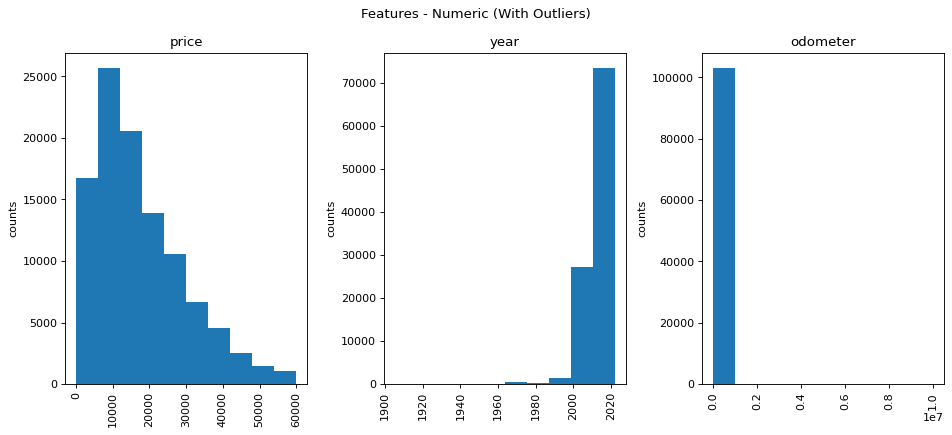

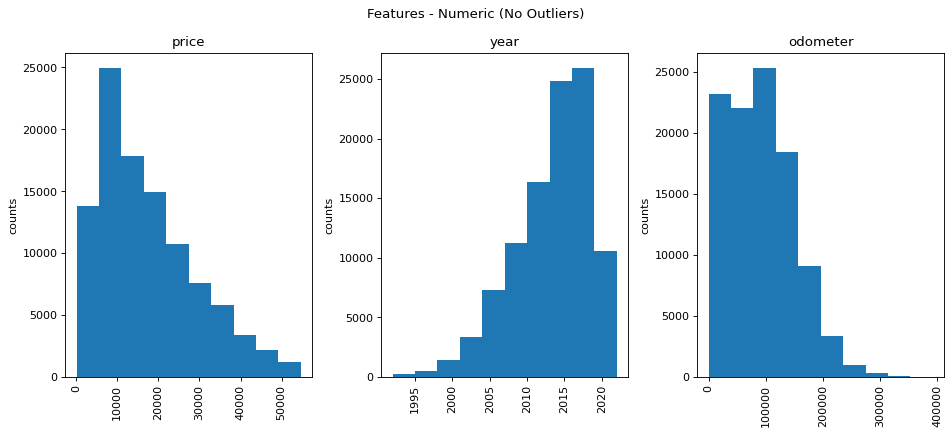

In [44]:
plotColumnCounts(df_filt, ['price', 'year', 'odometer'], 3, outlier_mask = False, stitle = 'Features - Numeric (With Outliers)', auto_show = False)
plt.savefig('images/numeric_with outliers', dpi = 300)
plt.show()
plotColumnCounts(df_filt, ['price', 'year', 'odometer'], 3, outlier_mask = True, stitle = 'Features - Numeric (No Outliers)')

Still have some outliers in year and odometer but, even if we were to remove those, we'd have to transform our distributions to reach greater normality. See how normal they are after transformation.

In [45]:
#df_filt['price_log'] = np.log(df_filt['price'])
#df_filt['year_sqrt'] = np.sqrt(df_filt['year'])
#df_filt['odom_log'] = np.log(df_filt['odometer']+1) # +1 to take care of zeroes in the data

#plotColumnCounts(df_filt, ['price_log', 'year_sqrt', 'odom_log'], 3, outlier_mask = False, stitle = 'Features - Numeric (Filtered)')

Transformed features for year and odometer still not normal enough. Remove outliers and try again.

In [46]:
#year_minimum = df_filt.year.mean()-(3*df_filt.year.std())

#df_filt['year_sqrt'] = np.sqrt(df_filt['year'][df_filt['year'] > year_minimum])
#(df_filt['year_sqrt']**2).hist()

In [47]:
#odometer_maximum = df_filt.odometer.mean()+(3*df_filt.odometer.std())

#df_filt['odom_log'] = np.log(df_filt['odometer'][df_filt['odometer'] < odometer_maximum]+1)
#np.exp(df_filt['odom_log']).hist()

In [48]:
#plotColumnCounts(df_filt, ['price_log', 'year_sqrt', 'odom_log'], 3, outlier_mask = False, stitle = 'Features - Numeric (Filtered)')

After removing outliers, the non-transformed features for all are less skewed; will use those instead.

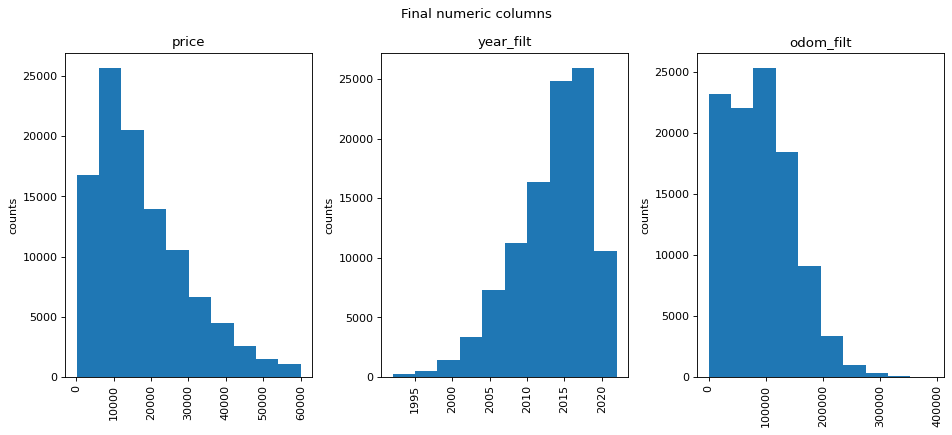

In [49]:
year_minimum = df_filt.year.mean()-(3*df_filt.year.std())
odometer_maximum = df_filt.odometer.mean()+(3*df_filt.odometer.std())

df_filt['year_filt'] = df_filt['year'][df_filt['year'] > year_minimum]
df_filt['odom_filt'] = df_filt['odometer'][df_filt['odometer'] < odometer_maximum]

plotColumnCounts(df_filt, ['price', 'year_filt', 'odom_filt'], 3, stitle = 'Final numeric columns')

<span style="color: Navy; text-decoration: underline">**Create squared features**</span>

Create squared features of `year_filt` and `odom_filt`, so as to check for higher-degree effects.

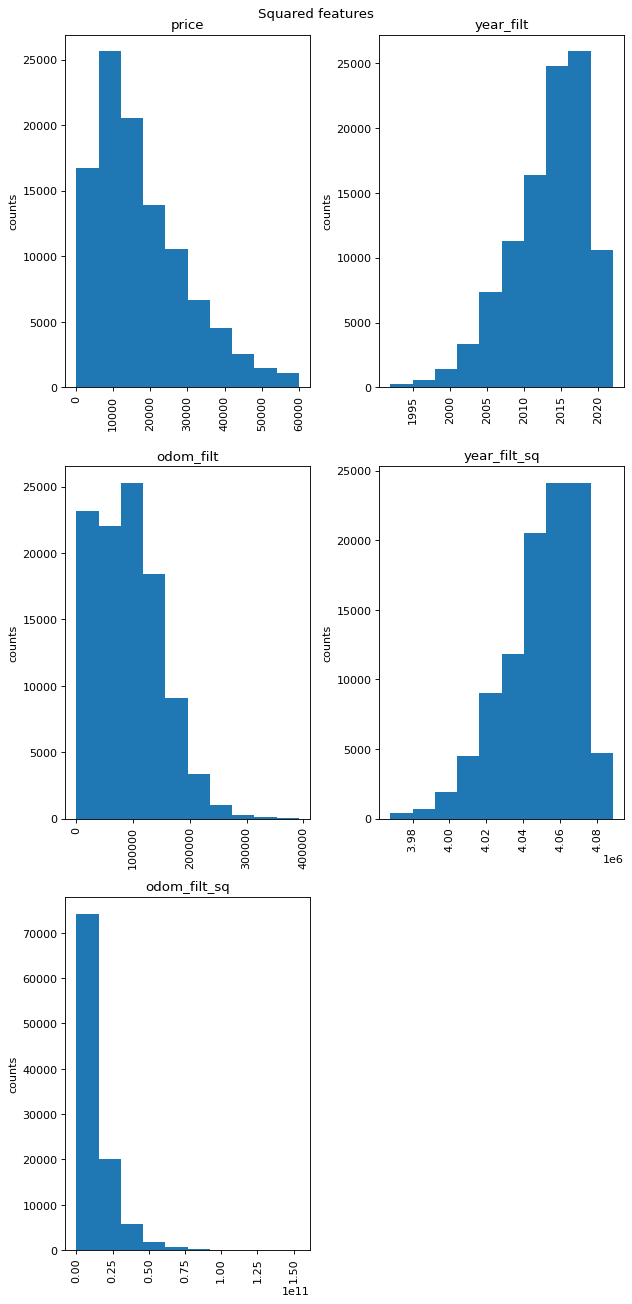

<Figure size 640x480 with 0 Axes>

In [50]:
df_filt['year_filt_sq'] = df_filt['year_filt']**2
df_filt['odom_filt_sq'] = df_filt['odom_filt']**2

plotColumnCounts(df_filt, ['price', 'year_filt', 'odom_filt', 'year_filt_sq', 'odom_filt_sq'], 2, stitle='Squared features')
plt.savefig('images/final_numeric_columns')

<span style="color: Navy; text-decoration: underline">**Encode categorical columns**</span>

Below, I will decide which encoding techniques to use with which categories. I visualize the codes after recent filtering, and then make decisions on how to encode or to drop entirely.

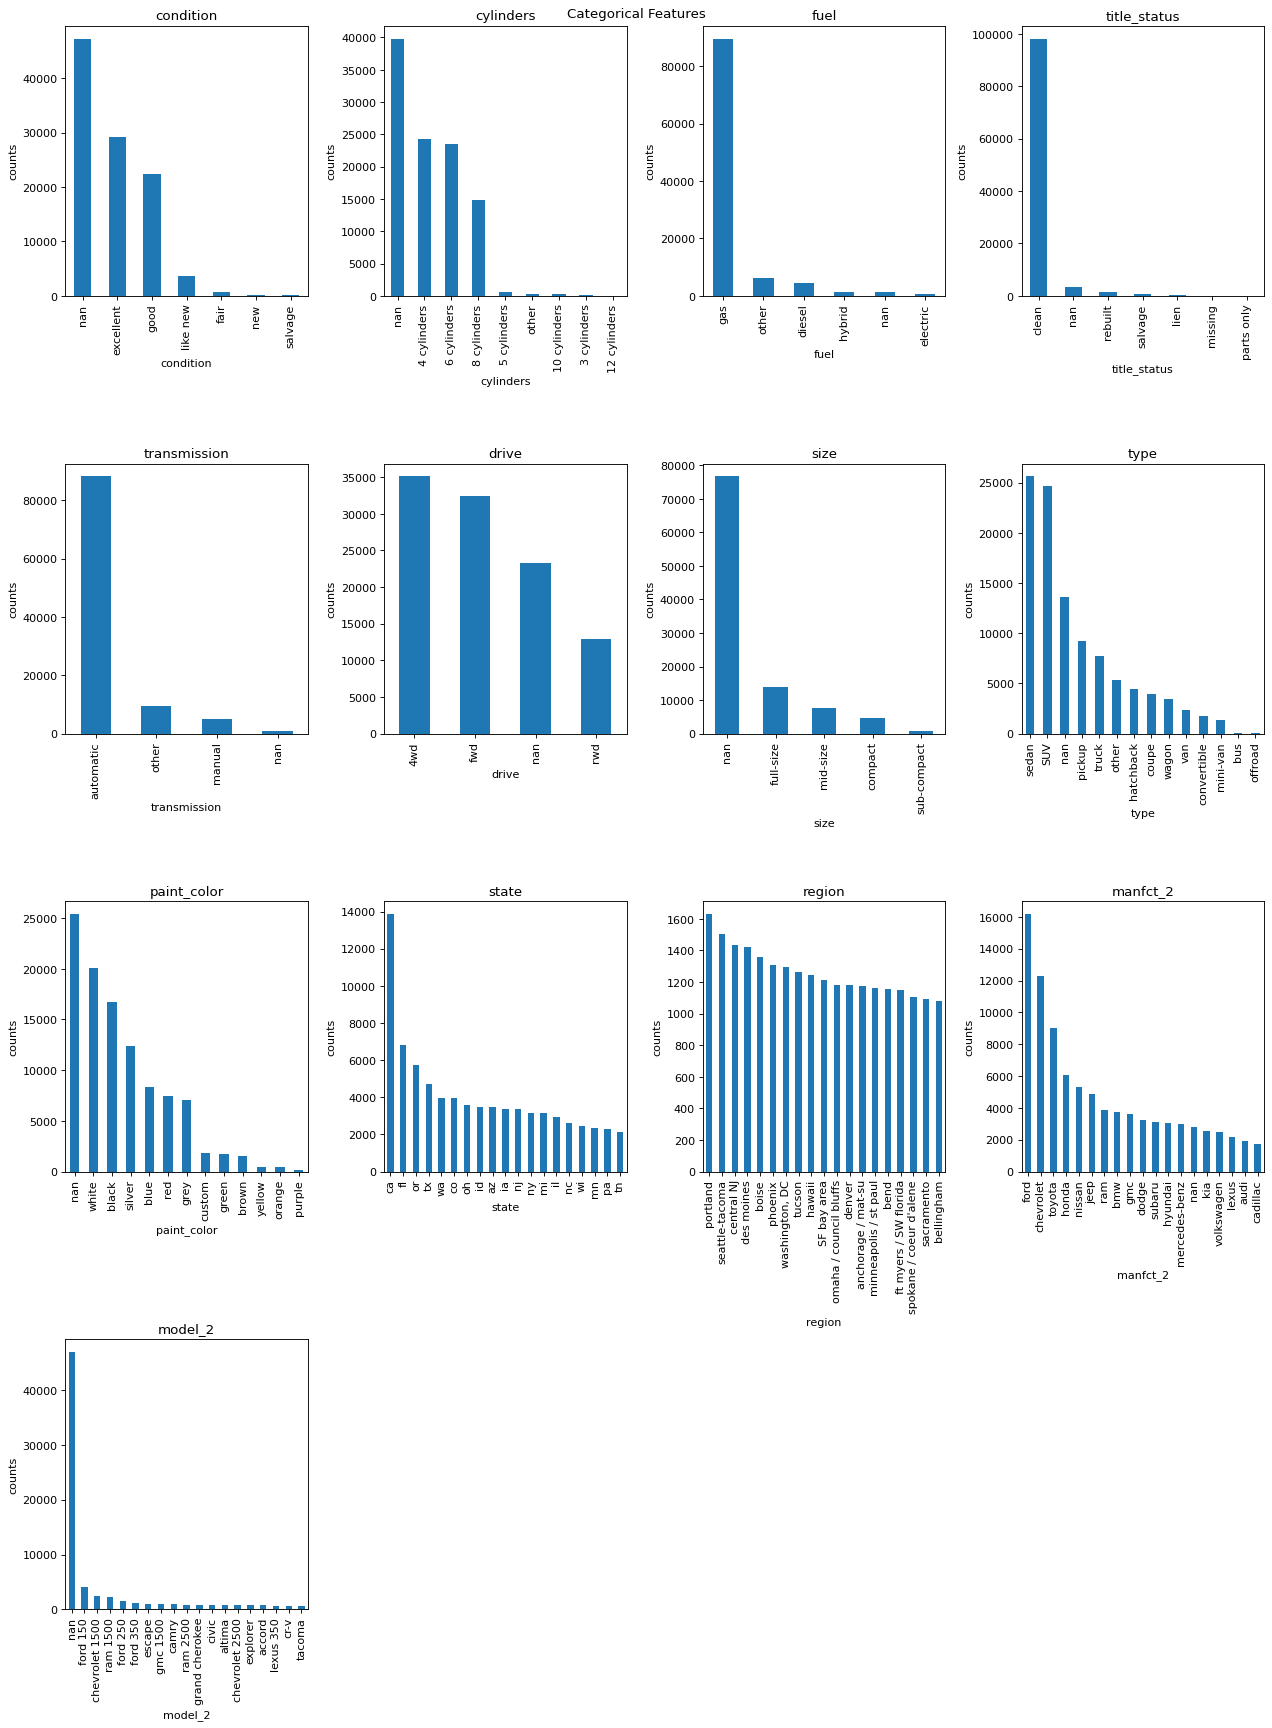

In [51]:
# Re-visualize distributions with newly filtered dataset

plotColumnCounts(df_filt, ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'region', 'manfct_2', 'model_2'],
                 4, stitle = 'Categorical Features', dropna = False)
plt.show()

I will use either OneHotEncoding (OHE) or TargetEncoding (TE). OHE has the benefit of representing the presence of the level of the factor itself, but results in many columns. TE keeps dimensionality low, but in situations where there are factor levels that make up a very small proportion of the dataset, the value for TE at that level may be very close to the price itself, which could throw off the final regresion results. Because I am using models based on linear regression, not logistic regression, I will not use ordinal encoding for features that could conceivably be ordinally encoded (e.g., `size`).

Based on the above, I will adopt the following strategies for each variable:
- `condition`: OHE; retain all features (this is likely to have a strong relationship to price, but low proportional representation for some categories make TE undesirable). Here, NaN values may be predictive, so recode missing data as a string called 'NaN'.
- `cylinders`: Remove; NaN is the most common category, and there's likely little information of value here over model.
- `fuel`: Remove; not a lot of variance
- `title_status`: Remove; almost no variance here
- `transmission`: OHE
- `drive`: TE; Replace NaN with 'NaN'
- `size`: Remove; NaN by far most populous value
- `type`: TE; Replace NaN with 'NaN'
- `paint_color`: Remove; NaN values is the most common value
- `state`: TE; this should map onto region strongly. Test for multicollinearity with `region`, and leave out `state` if so
- `region`: Use TE
- `manfct_2`: Use TE
- `model_2`: Remove; too many NaN after re-evaluating, so TE would likely not produce much value and OHE is not possible with so many categories

This will result in turning these 13 features to about 16. Plus the numeric variables, the final model should have less than 25 features. This is a lot, but not too many for models like Ridge Regression.

In [52]:
ohe_features = ['condition', 'transmission']
te_features = ['drive', 'type', 'state', 'region', 'model_2', 'manfct_2']
non_transformed_columns = ['year_filt', 'odom_filt', 'year_filt_sq', 'odom_filt_sq']

The actual encoding will occur during the model building, because TE is sensitive to data leakage across training, development, and test sets. Trimming will occur now, though.

In [53]:
features_to_trim = ['type']

# trim 'type' to remove low-proportion values
for feature in features_to_trim:
    df_filt[feature] = trim_feature(df_filt[feature], threshold = .01)

# replce missing data with 'NaN' to retain maximum value of other features
for feature in ohe_features + te_features:
    df_filt[feature] = df_filt[feature].apply(lambda x: "NaN" if pd.isna(x) else x)

# impute median (year) or trimmed median (odometer) values
for feature in ['year_filt', 'year_filt_sq']:
    df_filt[feature] = df_filt[feature].apply(lambda x: df_filt[feature].median() if pd.isna(x) else x)

df_filt['odom_filt'] = df_filt['odom_filt'].apply(lambda x: df_filt['odom_filt'].median() if pd.isna(x) else x)
df_filt['odom_filt_sq'] = df_filt['odom_filt_sq'].apply(lambda x: df_filt['odom_filt_sq'].median() if pd.isna(x) else x)

Check the correlation between all transformed variables within whole dataset state and region after Target Encoding both.

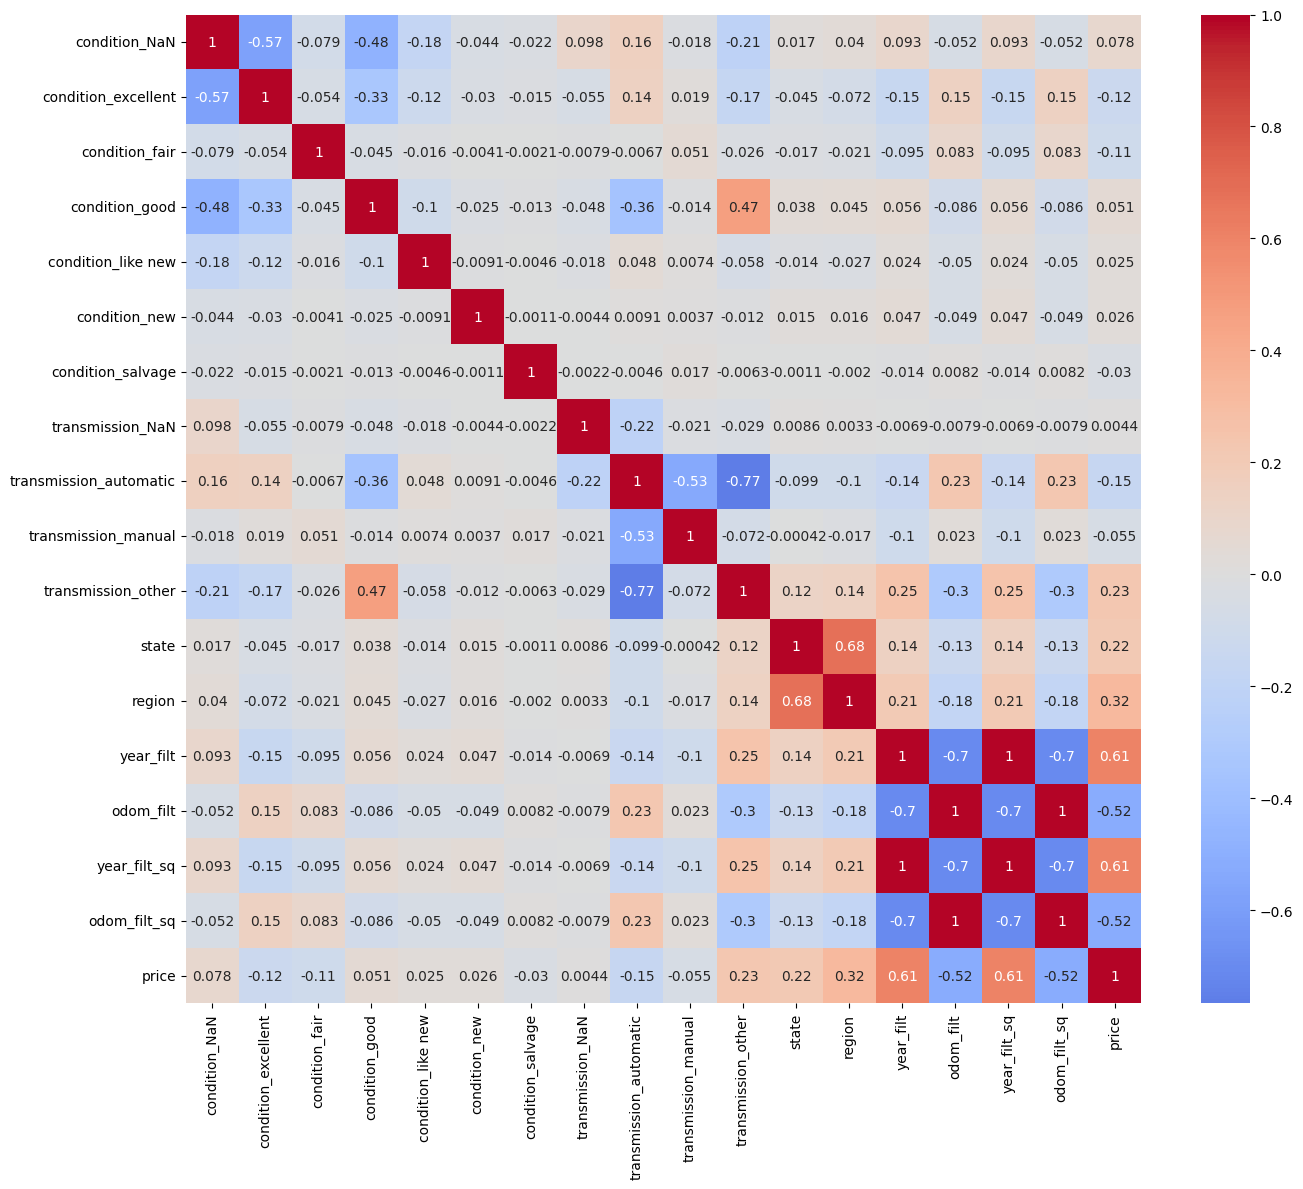

,state,region
state,1.000000,0.653003
region,0.653003,1.000000


In [54]:
check_OHE = OneHotEncoder(sparse_output = False)
df_check_OHE = check_OHE.fit_transform(df_filt[ohe_features])

check_TE = TargetEncoder()
df_check_TE = check_TE.fit_transform(df_filt[['state', 'region']], df_filt['price'])

df_check_OHE

df_check = pd.concat([pd.DataFrame(df_check_OHE, columns = check_OHE.get_feature_names_out()), df_check_TE.reset_index(), df_filt[non_transformed_columns].reset_index(), df_filt['price'].reset_index()],
                     axis=1).drop('id', axis =1)

plt.figure(figsize = (14, 12))
sns.heatmap(df_check.corr(method = 'spearman'), annot=True, center = 0, cmap = 'coolwarm')
plt.tight_layout()
plt.savefig('images/correlations_all.png', dpi=300)
plt.show()

df_check_TE.corr(method = 'pearson')

The perfect correlations b/t odometer & odometer_filt_sq, and year & year_filt_sq, is due to one being a squared feature of the other and this being a Spearman's correlation matrix (to account for OHE values). I think this model will be acceptable; r = .653 b/t state and region, which seems low enough to justify including both.

**Final check**: Make sure no missing data, and visualize category and distributions for all predictors (and price).

condition       0
transmission    0
drive           0
type            0
state           0
region          0
model_2         0
manfct_2        0
year_filt       0
odom_filt       0
year_filt_sq    0
odom_filt_sq    0
price           0
dtype: int64


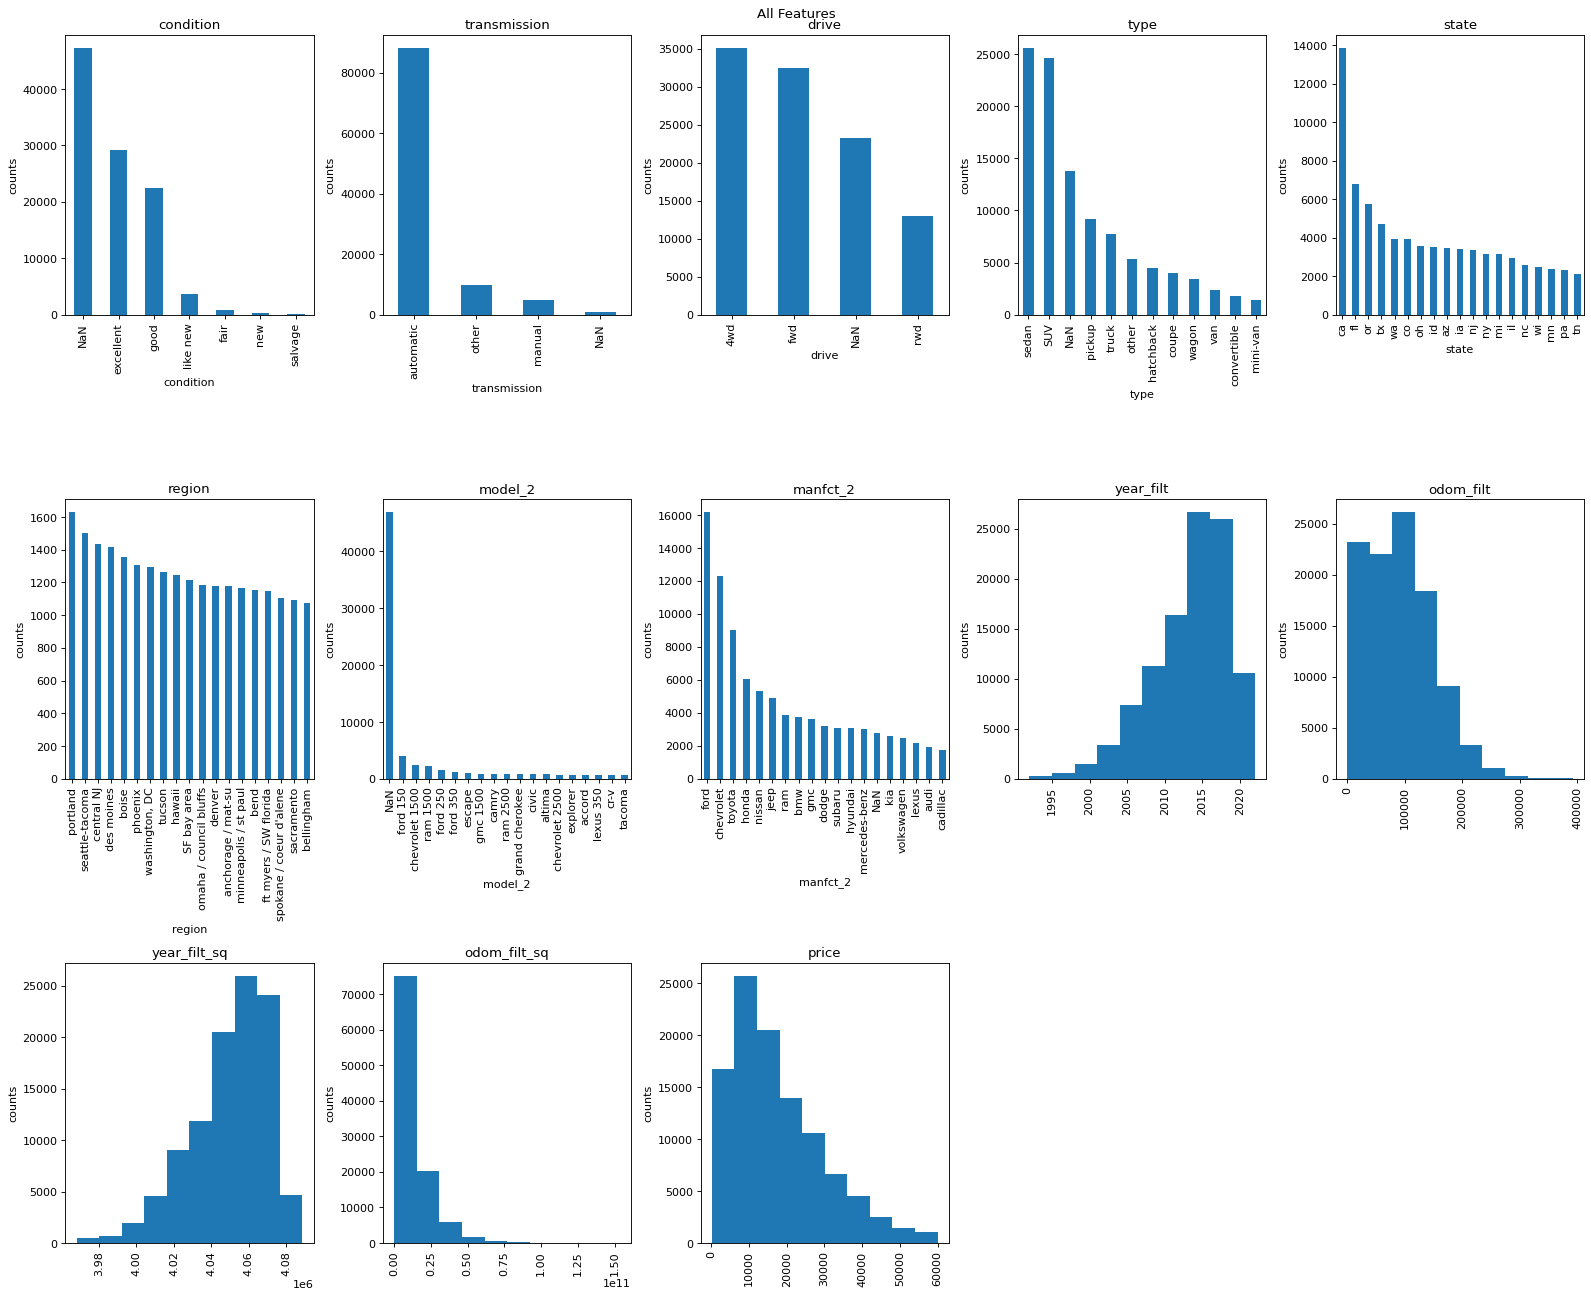

In [55]:
print(df_filt[ohe_features + te_features + non_transformed_columns + ['price']].isna().sum())

plotColumnCounts(df_filt, ohe_features + te_features + non_transformed_columns + ['price'], 5, stitle = 'All Features', dropna = False, auto_show = False)
plt.tight_layout()
plt.savefig('images/final_features', dpi = 300)
plt.show()

<span style="font-size: 35px; color: Navy">**Modeling**</span>

*(Instructions: With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.)*

In this section, I will:

- Investigate best models to use for this dataset
- Create a pipeline(s) for data transformation
- Apply gridsearch techniques and investigate effects of using different models (Ridge, Lasso regression)

<span style="font-size: 25px; color: Navy; text-decoration: underline">**Select Modeling Technique**</span>

Because the target variable is price, a numeric, continuous variable, and all predictors can be successfully encoded to numeric form, linear regression methods are appropriate. I will try Ridge and Lasso regression, and perform a grid search with alpha coefficients of powers of 10, from 10<sup>-3</sup> to 10<sup>3</sup>. I will not test full polynomial models, but I have created two features that are the square of predictors (for year and odometer) and these will be included in all modeling, to chech for nonlinear relationships between year and price, and between odometer and price.

<span style="font-size: 25px; color: Navy; text-decoration: underline">**Generate Test Design**</span>

Below, I will create the objects necessary for modeling: train/development/test datasets and pipelines for testing both ridge and lasso models.

In [56]:
# relevant feature name sets are re-defined here for easy reference. Removing `model_2` from te_features
ohe_features = ['condition', 'transmission']
te_features = ['drive', 'type', 'state', 'region', 'manfct_2']
non_transformed_columns = ['year_filt', 'odom_filt', 'year_filt_sq', 'odom_filt_sq']
all_predictors = ohe_features + te_features + non_transformed_columns

## Create train, development, and test set
X = df_filt[ohe_features + te_features + non_transformed_columns]
y = df_filt['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # get training dataset (60% of data)

cprint(("Training set size:", X_train.shape, y_train.shape), 'green')
cprint(("Test set size:", X_test.shape, y_test.shape), 'green')

('Training set size:', (82937, 11), (82937,))
('Test set size:', (20735, 11), (20735,))


Create Pipelines

In [57]:
# column encoder
column_encoder = ColumnTransformer(
    transformers = [
        ('OHE', OneHotEncoder(sparse_output=False, drop = ['excellent', 'automatic']), ohe_features), # drop the `excellent` and `automatic` columns from `condition` and `transmission`
        ('TE', Pipeline([ # want to both TE, then scale
            ('target_encoder', TargetEncoder()),
            ('scaler', StandardScaler())
            ]), te_features),
        ('scaler', StandardScaler(), non_transformed_columns)
    ],
    remainder = 'passthrough'
)

# pipelines
ridge_pipe = Pipeline([
    ('encode', column_encoder),
    ('ridge', Ridge())
])

lasso_pipe = Pipeline([
    ('encode', column_encoder),
    ('lasso', Lasso(random_state = 42))
])

# test to make sure column_encoder works
temp = column_encoder.fit_transform(X_train, y_train)
pd.DataFrame(temp, columns = column_encoder.get_feature_names_out()).head(5)

,OHE__condition_NaN,OHE__condition_fair,OHE__condition_good,OHE__condition_like new,OHE__condition_new,OHE__condition_salvage,OHE__transmission_NaN,OHE__transmission_manual,OHE__transmission_other,TE__drive,TE__type,TE__state,TE__region,TE__manfct_2,scaler__year_filt,scaler__odom_filt,scaler__year_filt_sq,scaler__odom_filt_sq
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.417633,-1.017876,-0.396981,0.469989,-1.508011,-0.759655,0.490273,-0.761047,0.198168
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999218,-0.159612,0.483705,0.654576,-0.303389,-1.349099,1.724057,-1.349583,1.852856
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.417633,-1.017876,1.226954,1.341064,-0.058329,-0.170211,-0.747613,-0.171632,-0.700349
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198447,-0.159612,-0.363613,-0.328162,0.514508,0.222752,0.713617,0.221800,0.441526
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.471792,-1.017876,-1.517107,-0.730964,-1.146533,-1.938543,0.421046,-1.937239,0.127780


<span style="font-size: 25px; color: Navy; text-decoration: underline">**Build Model**</span>

Below, I use `GridSearchCV` to find the best parameters for both Lasso and Ridge regression. I am not running group k-fold CV for region or state and will try splitting the data into 5 folds.

In [58]:
## Ridge gs
ridge_parameters = {'ridge__alpha': 10**np.linspace(-3, 3, 7)}
gs_ridge = GridSearchCV(ridge_pipe, ridge_parameters, cv=5, scoring='neg_mean_squared_error', verbose=1)
gs_ridge.fit(X_train, y_train)

print("Best parameters: ", gs_ridge.best_params_)
print("Best CV score: ", gs_ridge.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters:  {'ridge__alpha': 0.001}
Best CV score:  -66269105.33380941


In [59]:
lasso_parameters = {'lasso__alpha': 10**np.linspace(-3, 3, 7)}
gs_lasso = GridSearchCV(lasso_pipe, lasso_parameters, cv=5, scoring='neg_mean_squared_error', verbose=1)
gs_lasso.fit(X_train, y_train)

print("Best parameters: ", gs_lasso.best_params_)
print("Best CV score: ", gs_lasso.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.218e+12, tolerance: 1.002e+09
  model = cd_fast.enet_coordinate_descent(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.237e+12, tolerance: 1.005e+09
  model = cd_fast.enet_coordinate_descent(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+12, tolerance: 1.003e+09
  model = cd_fast.enet_

Best parameters:  {'lasso__alpha': 1.0}
Best CV score:  -67509917.16665363


C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+12, tolerance: 1.255e+09
  model = cd_fast.enet_coordinate_descent(


Based on training MSE, Ridge seemed to perform the best; moreover, Lasso had some convergence issues. However, I will compare how well both final models do when predicting the test dataset.

In [60]:
best_ridge = gs_ridge.best_estimator_
best_lasso = gs_lasso.best_estimator_

pd.DataFrame({'ridge': best_ridge.named_steps['ridge'].coef_, 'lasso': best_lasso.named_steps['lasso'].coef_}, index = best_ridge.named_steps['encode'].get_feature_names_out())

,ridge,lasso
OHE__condition_NaN,539.256015,608.469420
OHE__condition_fair,-4183.111450,-3088.669165
OHE__condition_good,311.133100,423.990952
OHE__condition_like new,1448.600291,1463.119859
OHE__condition_new,-966.288210,-0.000000
OHE__condition_salvage,-8241.718299,-5664.543286
OHE__transmission_NaN,345.352928,35.891624
OHE__transmission_manual,874.039600,864.713808
OHE__transmission_other,1733.658802,1776.934087
TE__drive,2033.172233,2045.521910


For the OHE coefficients, `OHE__condition_excellent` and `OHE__transmission_automatic` were left out, meaning that these coefficients should be interpreted relative to what a car with those characterstics would be.

In [61]:
# model prediction
cprint(f"Ridge -- RMSE: {round(np.sqrt(mean_squared_error(best_ridge.predict(X_test), y_test)), 2)} | R^2: {round(r2_score(best_ridge.predict(X_test), y_test), 3)}", 'green')
cprint(f"Lasso -- RMSE: {round(np.sqrt(mean_squared_error(best_lasso.predict(X_test), y_test)), 2)} | R^2: {round(r2_score(best_lasso.predict(X_test), y_test), 3)}", 'blue')

Ridge -- RMSE: 8166.22 | R^2: 0.222
Lasso -- RMSE: 8238.07 | R^2: 0.196


Based on both RMSE and R<sup>2</sup>, the Ridge model performs a bit better. However, the `year` coefficients were huge, with a small relative distance between them. I will test what happens when we take the square of `year` out. However, the absolute differnce between `odometer` and `odometer^2` was much smaller, so I will leave that in.

In [62]:
non_transformed_columns_2 = ['year_filt', 'odom_filt']

# new column_encoder
column_encoder = ColumnTransformer(
    transformers = [
        ('OHE', OneHotEncoder(sparse_output=False, drop = ['excellent', 'automatic']), ohe_features), # drop the `excellent` and `automatic` columns from `condition` and `transmission`
        ('TE', Pipeline([ # want to both TE, then scale
            ('target_encoder', TargetEncoder()),
            ('scaler', StandardScaler())
            ]), te_features),
        ('scaler', StandardScaler(), non_transformed_columns_2)
    ],
    remainder = 'drop'
)

# pipelines
ridge_pipe = Pipeline([
    ('encode', column_encoder),
    ('ridge', Ridge())
])

lasso_pipe = Pipeline([
    ('encode', column_encoder),
    ('lasso', Lasso(random_state = 42))
])


# rerun GS for both model types
## Ridge gs
ridge_parameters = {'ridge__alpha': 10**np.linspace(-3, 3, 7)}
gs_ridge = GridSearchCV(ridge_pipe, ridge_parameters, cv=5, scoring='neg_mean_squared_error', verbose=1)
gs_ridge.fit(X_train, y_train)

print("Best Ridge parameters: ", gs_ridge.best_params_)
print("Best Ridge CV score: ", gs_ridge.best_score_)

## Lasso gs
lasso_parameters = {'lasso__alpha': 10**np.linspace(-3, 3, 7)}
gs_lasso = GridSearchCV(lasso_pipe, lasso_parameters, cv=5, scoring='neg_mean_squared_error', verbose=1)
gs_lasso.fit(X_train, y_train)

print("Best Lasso parameters: ", gs_lasso.best_params_)
print("Best Lasso CV score: ", gs_lasso.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Ridge parameters:  {'ridge__alpha': 1.0}
Best Ridge CV score:  -68356709.71317255
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Lasso parameters:  {'lasso__alpha': 0.01}
Best Lasso CV score:  -68356812.58311749


In [63]:
best_ridge = gs_ridge.best_estimator_
best_lasso = gs_lasso.best_estimator_

pd.DataFrame({'ridge': best_ridge.named_steps['ridge'].coef_, 'lasso': best_lasso.named_steps['lasso'].coef_}, index = best_ridge.named_steps['encode'].get_feature_names_out())

,ridge,lasso
OHE__condition_NaN,729.837643,729.584764
OHE__condition_fair,-2416.028940,-2419.085418
OHE__condition_good,621.365028,620.975724
OHE__condition_like new,1701.047719,1701.092668
OHE__condition_new,1064.564588,1065.604226
OHE__condition_salvage,-6782.694387,-6904.561787
OHE__transmission_NaN,251.330249,250.501415
OHE__transmission_manual,1024.008280,1024.345602
OHE__transmission_other,2264.726467,2265.074467
TE__drive,2070.818924,2070.827918


In [64]:
# model prediction
cprint(f"Ridge -- RMSE: {round(np.sqrt(mean_squared_error(best_ridge.predict(X_test), y_test)), 2)} | R^2: {round(r2_score(best_ridge.predict(X_test), y_test), 3)}", 'green')
cprint(f"Lasso -- RMSE: {round(np.sqrt(mean_squared_error(best_lasso.predict(X_test), y_test)), 2)} | R^2: {round(r2_score(best_lasso.predict(X_test), y_test), 3)}", 'blue')

Ridge -- RMSE: 8302.96 | R^2: 0.176
Lasso -- RMSE: 8302.96 | R^2: 0.176


Explanatory power and error are notably higher. Although interpretation of this model is more straightforward, we'll stick with the other model.

Manufacturer, drive, and type were important to both models; let's visualize price differences for each.

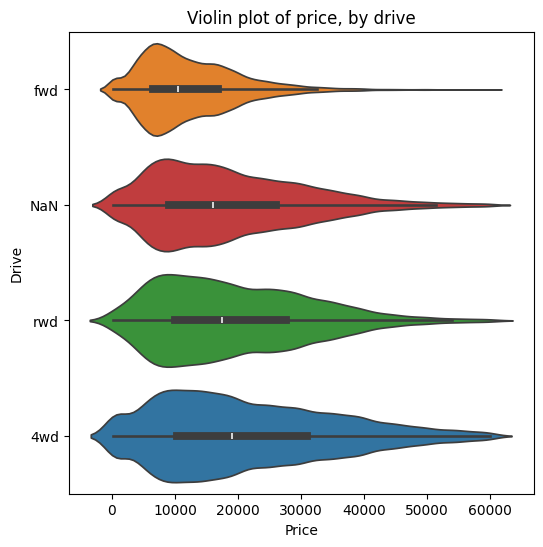

In [65]:
df_manf = df_filt[['price', 'drive']]
viol_order = df_manf.groupby('drive').mean('price').sort_values('price').index
viol_order
plt.figure(figsize = (6, 6))
sns.violinplot(df_manf, x = 'price', y='drive', hue='drive', order=viol_order)
plt.ylabel('Drive')
plt.xlabel('Price')
plt.title('Violin plot of price, by drive')
plt.savefig('images/violin_drive.png', dpi=300)
plt.show()

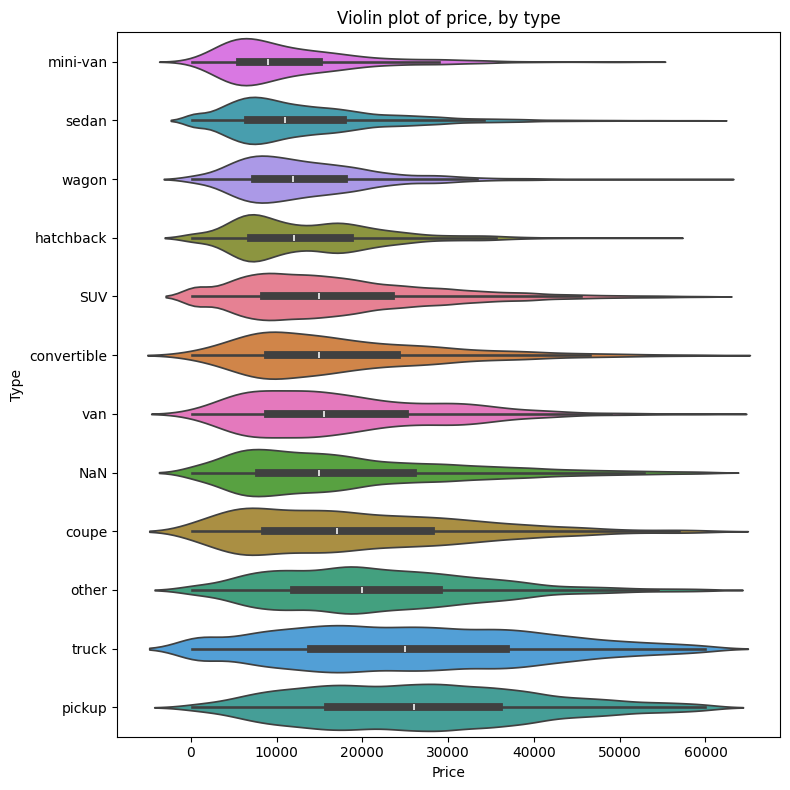

In [66]:
df_manf = df_filt[['price', 'type']]
viol_order = df_manf.groupby('type').mean('price').sort_values('price').index
viol_order
plt.figure(figsize = (8, 8))
sns.violinplot(df_manf, x = 'price', y='type', hue='type', order=viol_order)
plt.ylabel('Type')
plt.xlabel('Price')
plt.title('Violin plot of price, by type')
plt.tight_layout()
plt.savefig('images/violin_type.png', dpi=300)
plt.show()

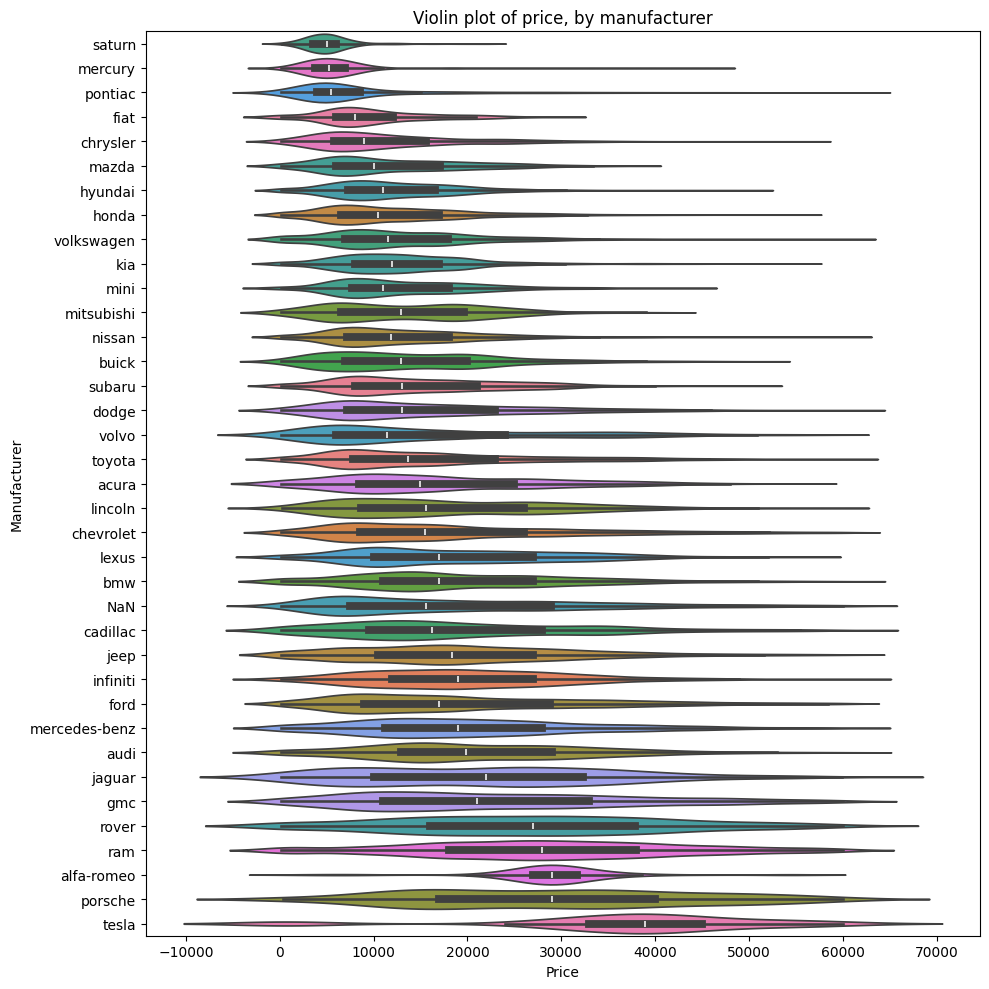

In [67]:
df_manf = df_filt[['price', 'manfct_2']]
viol_order = df_manf.groupby('manfct_2').mean('price').sort_values('price').index
viol_order
plt.figure(figsize = (10, 10))
sns.violinplot(df_manf, x = 'price', y='manfct_2', hue='manfct_2', order=viol_order)
plt.ylabel('Manufacturer')
plt.xlabel('Price')
plt.title('Violin plot of price, by manufacturer')
plt.tight_layout()
plt.savefig('images/violin_manufact.png', dpi=300)
plt.show()

<span style="font-size: 35px; color: Navy">**Evaluation**</span>

*(Instructions: With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.)*

For this project, there were a lot of decision points in data cleaning that would affect the final model strength. For instance, vehicle model is likely very predictive, because different vehicle model is one of the main decision points that automobile manufacturers make when ensuring certain qualities or features are included in vehicles. For instance, Honda Accords tend to be more expensive than Honda Civics, due to features like <a href=https://www.autonation.com/vehicle-research/honda-civic-vs-accord>advanced safety features, larger infotainment screens, and more advanced audio systems<a>. These are all features that are not captured in other dimension of our data, meaning that model will serve as a lower-dimension projection of these other features. So, it would likely increase predictive power if we included model, but in this dataset, `model` could not be included with any real interpretation other than 'different models will sell for more on average than other models', and further work would be required to identify which models sold the most. There is a similar issue with manufacturer, but there were fewer manufacturers in the dataset, and it seemed that the manufacturer input field was standardized (e.g., a drop-down menu, rather than a write-in), meaning that it was more feasible to include this in the model.

The business objective for this project is to identify the characteristics of cars that drive consumer spending on used cars, so as to effectively prioritize specific car characteristics for purchase and advertising. Certain features do stand out; for example, `condition` is very important; the reference category was 'excellent', and 'like_new' is associated with a large increase in price, whereas 'fair', and 'salvage' are associated with significant decreases. Likewise, for `transmission`, 'automatic' was the reference category, and 'manual' transmissions sell for more. Using this data, we can also provide a rank-order of which drive (rear-, front-, or four-wheel drive), vehicle type (e.g., mini-van, station wagon), and manufacturer of cars tend to sell for more. Importantly, we can also see that regional differences in prices exist, and so car dealers should use local markets to help weight their price points.

A point should be made about year and odometer. The model included degree-1 and degree-2 features for both. All four features are standardized variables with ranges in the data of a maximum of +/- 4, meaning that there is not much difference between the absolute values for each degree of each feature. The effect of both variables should be interpreted in light of this, and in light of the degree of difference between the coefficients for both variables. Although the coefficient for `year` and `year^2` are very large (abs. values > 744,000), the total effect of year should be interpreted in terms of the difference between the coefficients, which is ~4350. As the SD of the year increases, the price increases, meaning that newer cars will sell for more. Furthermore, the difference in signs means there's a quadratic relationships between year and price; at a certain point, older cars may sell for more, perhaps because they're in better condition. For odometer, there is a similar story, but the rate that which odometer values have a less negative, and then a positive, impact on price may be slower. This may be because price may rapidly decrease as odometer increases, but then that rate of decline evens out. In fact, as can be shown in the work below, the reverse would not start to happen until a z-value of ~1.3 for odometer, whereas the increase starts ~0.50 for year.

Minimum value for year: [0.49709736]
Minimum value for odometer: [1.33404185]


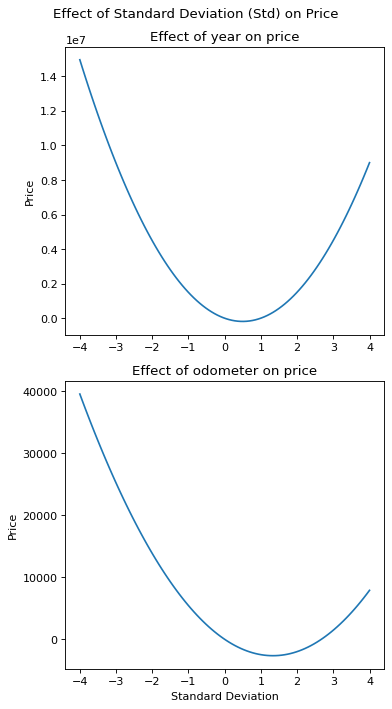

In [68]:
the_range = np.linspace(-4, 4, 100)
range_example = pd.DataFrame({
    'year': (the_range*-744492.645746 + (the_range**2)*748839.863285),
    'odometer': (the_range*-3954.705077 + (the_range**2)*1482.226764),
    'range': the_range})

from scipy.optimize import minimize # arbitrary function minimization library
print(f'Minimum value for year: {minimize(lambda the_range: the_range*-744492.645746 + (the_range**2)*748839.863285, x0 = 4).x}')
print(f'Minimum value for odometer: {minimize(lambda the_range: the_range*-3954.705077 + (the_range**2)*1482.226764, x0 = 4).x}')

# create plots for both
plt.figure(figsize = (5, 9), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.suptitle('Effect of Standard Deviation (Std) on Price')

plt.subplot(2, 1, 1)
range_example.plot.line(x = 'range', y = 'year', legend = False, ax = plt.gca())
plt.title('Effect of year on price')
plt.ylabel('Price')
plt.xlabel(None)

plt.subplot(2, 1, 2)
range_example.plot.line(x = 'range', y = 'odometer', legend = False, ax = plt.gca())
plt.title('Effect of odometer on price')
plt.xlabel('Standard Deviation')
plt.ylabel('Price')

plt.tight_layout()
plt.savefig('images/std_year_odom.png')#, dpi = 300)
plt.show()

In [69]:
df_filt['year'].mean()

2012.3516392965857

In [70]:
year_reversal = df_filt['year_filt'].mean() + 0.49709736*df_filt["year_filt"].std()
odom_reversal = df_filt['odom_filt'].mean() + 1.33404185*df_filt["odom_filt"].std()

print(f'Year information. Mean: {round(df_filt["year_filt"].mean(),2)}; STD: {round(df_filt["year_filt"].std(),2)}. Point of reversal: {round(year_reversal, 0)}')
print(f'Odom information. Mean: {round(df_filt["odom_filt"].mean(),2)}; STD: {round(df_filt["odom_filt"].std(),2)}. Point of reversal: {round(odom_reversal, 0)}')

Year information. Mean: 2012.86; STD: 5.09. Point of reversal: 2015.0
Odom information. Mean: 91678.69; STD: 57769.03. Point of reversal: 168745.0


This is all useful, but will have to be interpreted.

<span style="font-size: 35px; color: Navy">**Deployment**</span>

*(Instructions: Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.)*

Because I found a main effect for both region and state, the first thing I would emphasize is that it is important to focus on local market conditions to set exact prices, and to identify which vehicles are important for the dealer's customers. From there, it is possible to make solid recommendations based on the findings.

Further ideas to try:
- Subset future models by region, depending on car dealer's location
- Higher degree models, to check for interaction effects between variables and higher-order relationships b/t features and price

The .Readme file of the Github repo will include more deployment information.